## Pipe Line

    -> Collecting Data
    -> Loading Data 
    -> Feature Engineering 
    
    
                 - Handling Missing values
                 - Checking Normal Distribution
                 - Variable Transformation
                 - Feature scalling
                 - Handling Outliers
                 - Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
from pandas.plotting import scatter_matrix

In [5]:
df.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,Good


In [6]:
df.shape

(150002, 18)

In [7]:
df['Good_Bad'].isnull().sum()

2

In [8]:
def dep(df,var):
    de = df[var].mode()[0]
    df[var].fillna(de,inplace=True)
    
dep(df,'Good_Bad')

In [9]:
df['Good_Bad'].isnull().sum()

0

In [10]:
df['Good_Bad'].unique()

array(['Bad', 'Good'], dtype=object)

In [11]:
y = df['Good_Bad']

In [12]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [13]:
df['Good_Bad'] = df['Good_Bad'].map({'Good':1,'Bad':2})

In [14]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [15]:
df['Good_Bad'].unique()

array([2, 1], dtype=int64)

In [16]:
y = df['Good_Bad']

In [17]:
y.unique()

array([2, 1], dtype=int64)

In [18]:
df.columns

Index(['NPA Status', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [19]:
df.shape

(150002, 18)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

# Seperating Categorical & Numerical Data

In [21]:
df_numerical = df.select_dtypes(exclude='object')
df_categorical = df.select_dtypes(include='object')

In [22]:
df_categorical.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education,NumberOfDependents
0,Male,South,Ownhouse,Self_Emp,Matric,2.0
1,Female,South,Ownhouse,Self_Emp,Graduate,1.0
2,Female,South,Ownhouse,Self_Emp,PhD,0.0
3,Female,South,Ownhouse,Self_Emp,Professional,0.0
4,Male,South,Ownhouse,Self_Emp,Post-Grad,0.0


In [23]:
df_numerical.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,Good_Bad
0,1.0,0.766127,45.0,9120.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2
1,0.0,0.957151,40.0,2600.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1
2,0.0,0.658180,38.0,3042.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,1
3,0.0,0.233810,30.0,3300.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,1
4,0.0,0.907239,49.0,63588.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,1


### For Numerical data

In [24]:
df_numerical.shape

(150002, 12)

In [25]:
df_numerical.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
MonthlyIncome                           29733
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
Good_Bad                                    0
dtype: int64

In [26]:
df_categorical.isnull().sum()

Gender                   2
Region                   2
Rented_OwnHouse          2
Occupation               2
Education                2
NumberOfDependents    3924
dtype: int64

In [27]:
withnull = []
for i in df_numerical.columns:
    if df_numerical[i].isnull().sum()>0:
        withnull.append(i)

In [28]:
withnull

['NPA Status',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'MonthlyIncome',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome.1',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse']

In [29]:
mean = df_numerical['NPA Status'].mean()
median = df_numerical['NPA Status'].median()
mode = df_numerical["NPA Status"].mode()



In [30]:
print(mean,',', median, ' ,', mode)

0.06684 , 0.0  , 0    0.0
dtype: float64


In [31]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NPA Status')

In [32]:
df_numerical['NPA Status_mean'].isnull().sum()

0

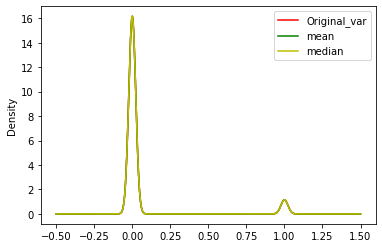

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NPA Status'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NPA Status_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NPA Status_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['NPA Status_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [34]:
print("Std of original varibale {} ".format(df_numerical['NPA Status'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NPA Status_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NPA Status_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['NPA Status_mode'].std()))

Std of original varibale 0.24974553092870277 
Std of original varibale mean 0.24974386596404644 
Std of original varibale  median 0.24974398521937793 
Std of original varibale mode 0.0 


In [35]:
df_numerical = df_numerical.drop(['NPA Status','NPA Status_mean','NPA Status_mode'],axis = 1)

In [36]:
df_numerical.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        2
age                                         2
MonthlyIncome                           29733
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
Good_Bad                                    0
NPA Status_median                           0
dtype: int64

In [37]:
mean = df_numerical['RevolvingUtilizationOfUnsecuredLines'].mean()
median = df_numerical['RevolvingUtilizationOfUnsecuredLines'].median()
mode = df_numerical["RevolvingUtilizationOfUnsecuredLines"].mode()

In [38]:
print(mean,',', median,',' ,mode)

6.048438058660644 , 0.154180737 , 0    0.0
dtype: float64


In [39]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'RevolvingUtilizationOfUnsecuredLines')

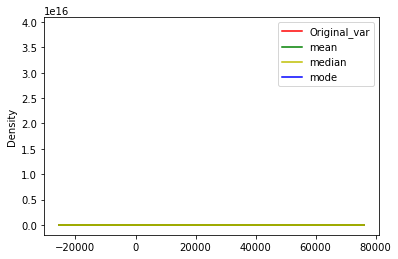

In [40]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['RevolvingUtilizationOfUnsecuredLines'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['RevolvingUtilizationOfUnsecuredLines_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['RevolvingUtilizationOfUnsecuredLines_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
df_numerical['RevolvingUtilizationOfUnsecuredLines_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [41]:
print("Std of original varibale {} ".format(df_numerical['RevolvingUtilizationOfUnsecuredLines'].std()))
print("Std of original varibale mean {} ".format(df_numerical['RevolvingUtilizationOfUnsecuredLines_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['RevolvingUtilizationOfUnsecuredLines_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['RevolvingUtilizationOfUnsecuredLines_mode'].std()))

Std of original varibale 249.75537062532774 
Std of original varibale mean 249.75370559507365 
Std of original varibale  median 249.75370652241892 
Std of original varibale mode 8.726382061154579e-14 


In [42]:
df_numerical = df_numerical.drop(['RevolvingUtilizationOfUnsecuredLines','RevolvingUtilizationOfUnsecuredLines_mean','RevolvingUtilizationOfUnsecuredLines_mode'],axis = 1)

In [43]:
df_numerical.isnull().sum()

age                                                2
MonthlyIncome                                  29733
NumberOfTime30-59DaysPastDueNotWorse               2
DebtRatio                                          2
MonthlyIncome.1                                29733
NumberOfOpenCreditLinesAndLoans                    2
NumberOfTimes90DaysLate                            2
NumberRealEstateLoansOrLines                       2
NumberOfTime60-89DaysPastDueNotWorse               2
Good_Bad                                           0
NPA Status_median                                  0
RevolvingUtilizationOfUnsecuredLines_median        0
dtype: int64

In [44]:
mean = df_numerical['age'].mean()
median = df_numerical['age'].median()
mode = df_numerical['age'].mode()

In [45]:
print(mean,',', median,',' ,mode)

52.295206666666665 , 52.0 , 0    49.0
dtype: float64


In [46]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'age')

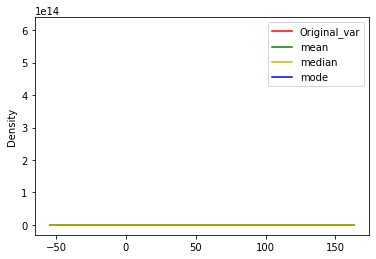

In [47]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['age'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['age_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['age_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
df_numerical['age_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [48]:
print("Std of original varibale {} ".format(df_numerical['age'].std()))
print("Std of original varibale mean {} ".format(df_numerical['age_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['age_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['age_mode'].std()))

Std of original varibale 14.771865863100714 
Std of original varibale mean 14.771767384323221 
Std of original varibale  median 14.771767423653122 
Std of original varibale mode 0.0 


In [49]:
df_numerical = df_numerical.drop(['age','age_mean','age_mode'],axis =1)

In [50]:
mean = df_numerical['MonthlyIncome'].mean()
median = df_numerical['MonthlyIncome'].median()
mode = df_numerical['MonthlyIncome'].mode()

In [51]:
print(mean,',', median, ' ,', mode)

6670.221237392844 , 5400.0  , 0    5000.0
dtype: float64


In [52]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'MonthlyIncome')

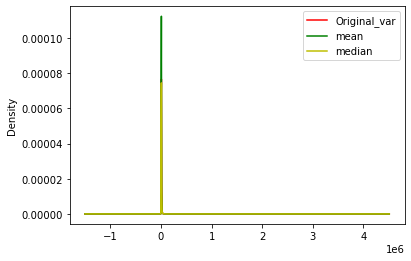

In [53]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['MonthlyIncome'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['MonthlyIncome_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['MonthlyIncome_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['MonthlyIncome_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [54]:
print("Std of original varibale {} ".format(df_numerical['MonthlyIncome'].std()))
print("Std of original varibale mean {} ".format(df_numerical['MonthlyIncome_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['MonthlyIncome_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['MonthlyIncome_mode'].std()))

Std of original varibale 14384.67421528196 
Std of original varibale mean 12880.359886875807 
Std of original varibale  median 12890.310142911287 
Std of original varibale mode 0.0 


In [55]:
df_numerical = df_numerical.drop(['MonthlyIncome','MonthlyIncome_mean','MonthlyIncome_mode'],axis = 1)

In [56]:
df_numerical.columns

Index(['NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'Good_Bad', 'NPA Status_median',
       'RevolvingUtilizationOfUnsecuredLines_median', 'age_median',
       'MonthlyIncome_median'],
      dtype='object')

In [57]:
mean = df_numerical['NumberOfTime30-59DaysPastDueNotWorse'].mean()
median = df_numerical['NumberOfTime30-59DaysPastDueNotWorse'].median()
mode = df_numerical["NumberOfTime30-59DaysPastDueNotWorse"].mode()

In [58]:
print(mean,',', median,',' ,mode)

0.4210333333333333 , 0.0 , 0    0.0
dtype: float64


In [59]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NumberOfTime30-59DaysPastDueNotWorse')

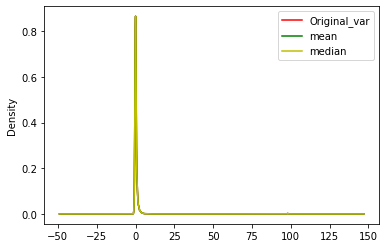

In [60]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NumberOfTime30-59DaysPastDueNotWorse'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NumberOfTime30-59DaysPastDueNotWorse_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NumberOfTime30-59DaysPastDueNotWorse_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['NumberOfTime30-59DaysPastDueNotWorse_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [61]:
print("Std of original varibale {} ".format(df_numerical['NumberOfTime30-59DaysPastDueNotWorse'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NumberOfTime30-59DaysPastDueNotWorse_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NumberOfTime30-59DaysPastDueNotWorse_median'].std()))
#print("Std of original varibale mode {} ".format(df_numerical['NumberOfTime30-59DaysPastDueNotWorse_mode'].std()))

Std of original varibale 4.192781272016828 
Std of original varibale mean 4.1927533202348535 
Std of original varibale  median 4.192753602095087 


In [62]:
df_numerical = df_numerical.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse_mean'],axis =1)

In [63]:
df_numerical.isnull().sum()

DebtRatio                                          2
MonthlyIncome.1                                29733
NumberOfOpenCreditLinesAndLoans                    2
NumberOfTimes90DaysLate                            2
NumberRealEstateLoansOrLines                       2
NumberOfTime60-89DaysPastDueNotWorse               2
Good_Bad                                           0
NPA Status_median                                  0
RevolvingUtilizationOfUnsecuredLines_median        0
age_median                                         0
MonthlyIncome_median                               0
NumberOfTime30-59DaysPastDueNotWorse_median        0
NumberOfTime30-59DaysPastDueNotWorse_mode          0
dtype: int64

In [64]:
mean_1 = df_numerical['DebtRatio'].mean()
median_1 = df_numerical['DebtRatio'].median()
mode_1 = df_numerical["DebtRatio"].mode()

In [65]:
print(mean_1,',', median_1,',' ,mode_1)

353.0050757599551 , 0.366507841 , 0    0.0
dtype: float64


In [66]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean_1)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median_1)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode_1)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'DebtRatio')

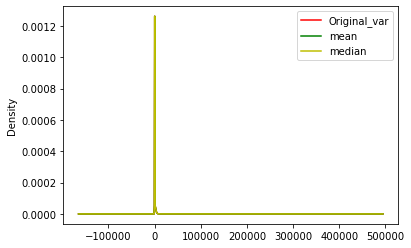

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['DebtRatio'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['DebtRatio_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['DebtRatio_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['DebtRatio_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [68]:
print("Std of original varibale {} ".format(df_numerical['DebtRatio'].std()))
print("Std of original varibale mean {} ".format(df_numerical['DebtRatio_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['DebtRatio_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['DebtRatio_mode'].std()))

Std of original varibale 2037.8185231450113 
Std of original varibale mean 2037.8049377334748 
Std of original varibale  median 2037.8053445486164 
Std of original varibale mode 2.494901497178953e-12 


In [69]:
df_numerical = df_numerical.drop(['DebtRatio','DebtRatio_mean','DebtRatio_mode'], axis =1)

In [70]:
df_numerical.isnull().sum()

MonthlyIncome.1                                29733
NumberOfOpenCreditLinesAndLoans                    2
NumberOfTimes90DaysLate                            2
NumberRealEstateLoansOrLines                       2
NumberOfTime60-89DaysPastDueNotWorse               2
Good_Bad                                           0
NPA Status_median                                  0
RevolvingUtilizationOfUnsecuredLines_median        0
age_median                                         0
MonthlyIncome_median                               0
NumberOfTime30-59DaysPastDueNotWorse_median        0
NumberOfTime30-59DaysPastDueNotWorse_mode          0
DebtRatio_median                                   0
dtype: int64

In [71]:
mean = df_numerical['MonthlyIncome.1'].mean()
median = df_numerical['MonthlyIncome.1'].median()
mode = df_numerical["MonthlyIncome.1"].mode()

In [72]:
print(mean,',', median,',' ,mode)

6670.221237392844 , 5400.0 , 0    5000.0
dtype: float64


In [73]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'MonthlyIncome.1')

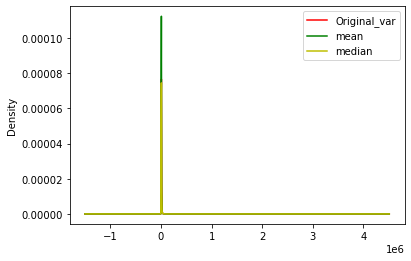

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['MonthlyIncome.1'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['MonthlyIncome.1_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['MonthlyIncome.1_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['MonthlyIncome.1_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [75]:
print("Std of original varibale {} ".format(df_numerical['MonthlyIncome.1'].std()))
print("Std of original varibale mean {} ".format(df_numerical['MonthlyIncome.1_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['MonthlyIncome.1_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['MonthlyIncome.1_mode'].std()))

Std of original varibale 14384.67421528196 
Std of original varibale mean 12880.359886875807 
Std of original varibale  median 12890.310142911287 
Std of original varibale mode 0.0 


In [76]:
df_numerical = df_numerical.drop(['MonthlyIncome.1','MonthlyIncome.1_mean','MonthlyIncome.1_mode'],axis =1)

In [77]:
mean = df_numerical['NumberOfOpenCreditLinesAndLoans'].mean()
median = df_numerical['NumberOfOpenCreditLinesAndLoans'].median()
mode = df_numerical["NumberOfOpenCreditLinesAndLoans"].mode()

In [78]:
print(mean,',', median,',' ,mode)

8.45276 , 8.0 , 0    6.0
dtype: float64


In [79]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NumberOfOpenCreditLinesAndLoans')

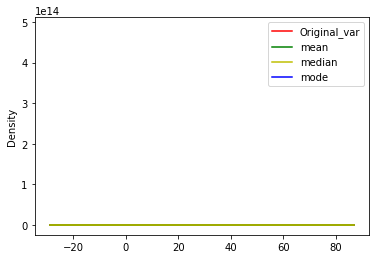

In [80]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NumberOfOpenCreditLinesAndLoans'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NumberOfOpenCreditLinesAndLoans_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NumberOfOpenCreditLinesAndLoans_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
df_numerical['NumberOfOpenCreditLinesAndLoans_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [81]:
print("Std of original varibale {} ".format(df_numerical['NumberOfOpenCreditLinesAndLoans'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NumberOfOpenCreditLinesAndLoans_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NumberOfOpenCreditLinesAndLoans_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['NumberOfOpenCreditLinesAndLoans_mode'].std()))

Std of original varibale 5.145950989645245 
Std of original varibale mean 5.145916683419668 
Std of original varibale  median 5.145916948983779 
Std of original varibale mode 0.0 


In [82]:
df_numerical = df_numerical.drop(['NumberOfOpenCreditLinesAndLoans','NumberOfOpenCreditLinesAndLoans_mean','NumberOfOpenCreditLinesAndLoans_mode'],axis =1)

In [83]:
df_numerical.isnull().sum()

NumberOfTimes90DaysLate                        2
NumberRealEstateLoansOrLines                   2
NumberOfTime60-89DaysPastDueNotWorse           2
Good_Bad                                       0
NPA Status_median                              0
RevolvingUtilizationOfUnsecuredLines_median    0
age_median                                     0
MonthlyIncome_median                           0
NumberOfTime30-59DaysPastDueNotWorse_median    0
NumberOfTime30-59DaysPastDueNotWorse_mode      0
DebtRatio_median                               0
MonthlyIncome.1_median                         0
NumberOfOpenCreditLinesAndLoans_median         0
dtype: int64

In [84]:
mean = df_numerical['NumberOfTimes90DaysLate'].mean()
median = df_numerical['NumberOfTimes90DaysLate'].median()
mode = df_numerical["NumberOfTimes90DaysLate"].mode()

In [85]:
print(mean,',', median,',' ,mode)

0.26597333333333334 , 0.0 , 0    0.0
dtype: float64


In [86]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NumberOfTimes90DaysLate')

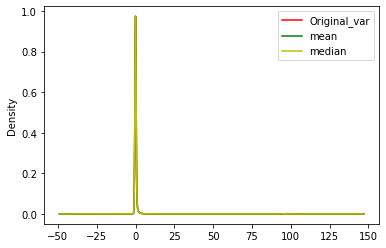

In [87]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NumberOfTimes90DaysLate'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NumberOfTimes90DaysLate_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NumberOfTimes90DaysLate_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['NumberOfTimes90DaysLate_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [88]:
print("Std of original varibale {} ".format(df_numerical['NumberOfTimes90DaysLate'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NumberOfTimes90DaysLate_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NumberOfTimes90DaysLate_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['NumberOfTimes90DaysLate_mode'].std()))

Std of original varibale 4.169303787598968 
Std of original varibale mean 4.169275992333034 
Std of original varibale  median 4.169276105445594 
Std of original varibale mode 0.0 


In [89]:
df_numerical = df_numerical.drop(['NumberOfTimes90DaysLate','NumberOfTimes90DaysLate_mean','NumberOfTimes90DaysLate_mode'],axis =1)

In [90]:
df_numerical.isnull().sum()

NumberRealEstateLoansOrLines                   2
NumberOfTime60-89DaysPastDueNotWorse           2
Good_Bad                                       0
NPA Status_median                              0
RevolvingUtilizationOfUnsecuredLines_median    0
age_median                                     0
MonthlyIncome_median                           0
NumberOfTime30-59DaysPastDueNotWorse_median    0
NumberOfTime30-59DaysPastDueNotWorse_mode      0
DebtRatio_median                               0
MonthlyIncome.1_median                         0
NumberOfOpenCreditLinesAndLoans_median         0
NumberOfTimes90DaysLate_median                 0
dtype: int64

In [91]:
mean = df_numerical['NumberRealEstateLoansOrLines'].mean()
median = df_numerical['NumberRealEstateLoansOrLines'].median()
mode = df_numerical['NumberRealEstateLoansOrLines'].mode()

In [92]:
print(mean,',', median,',' ,mode)

1.01824 , 1.0 , 0    0.0
dtype: float64


In [93]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NumberRealEstateLoansOrLines')

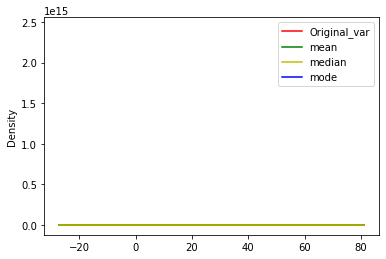

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NumberRealEstateLoansOrLines'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NumberRealEstateLoansOrLines_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NumberRealEstateLoansOrLines_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
df_numerical['NumberRealEstateLoansOrLines_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [95]:
print("Std of original varibale {} ".format(df_numerical['NumberRealEstateLoansOrLines'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NumberRealEstateLoansOrLines_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NumberRealEstateLoansOrLines_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['NumberRealEstateLoansOrLines_mode'].std()))

Std of original varibale 1.129770984881952 
Std of original varibale mean 1.1297634531004919 
Std of original varibale  median 1.1297634550648128 
Std of original varibale mode 0.0 


In [96]:
df_numerical = df_numerical.drop(['NumberRealEstateLoansOrLines','NumberRealEstateLoansOrLines_mean','NumberRealEstateLoansOrLines_mode'],axis =1)

In [97]:
df_numerical.isnull().sum()

NumberOfTime60-89DaysPastDueNotWorse           2
Good_Bad                                       0
NPA Status_median                              0
RevolvingUtilizationOfUnsecuredLines_median    0
age_median                                     0
MonthlyIncome_median                           0
NumberOfTime30-59DaysPastDueNotWorse_median    0
NumberOfTime30-59DaysPastDueNotWorse_mode      0
DebtRatio_median                               0
MonthlyIncome.1_median                         0
NumberOfOpenCreditLinesAndLoans_median         0
NumberOfTimes90DaysLate_median                 0
NumberRealEstateLoansOrLines_median            0
dtype: int64

In [98]:
mean = df_numerical['NumberOfTime60-89DaysPastDueNotWorse'].mean()
median = df_numerical['NumberOfTime60-89DaysPastDueNotWorse'].median()
mode = df_numerical['NumberOfTime60-89DaysPastDueNotWorse'].mode()

In [99]:
print(mean,',', median,',' ,mode)

0.24038666666666667 , 0.0 , 0    0.0
dtype: float64


In [100]:
def missing(df_numerical,var):
    df_numerical[var+'_mean'] = df_numerical[var].fillna(mean)
    df_numerical[var+'_median'] = df_numerical[var].fillna(median)
    df_numerical[var+'_mode'] = df_numerical[var].fillna(mode)[0]
    
for i in df_numerical.columns:
    missing(df_numerical,'NumberOfTime60-89DaysPastDueNotWorse')

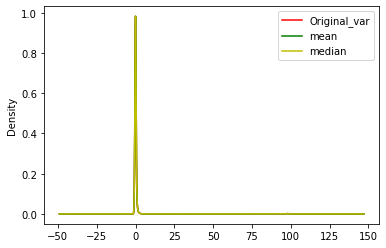

In [101]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df_numerical['NumberOfTime60-89DaysPastDueNotWorse'].plot(kind = 'kde',ax = ax,color = 'r' , label = 'Original_var')
df_numerical['NumberOfTime60-89DaysPastDueNotWorse_mean'].plot(kind = 'kde',ax = ax,color = 'g' , label = 'mean')
df_numerical['NumberOfTime60-89DaysPastDueNotWorse_median'].plot(kind = 'kde',ax = ax,color = 'y' , label = 'median')
#df_numerical['NumberOfTime60-89DaysPastDueNotWorse_mode'].plot(kind = 'kde',ax = ax,color = 'b' , label = 'mode')
plt.legend(loc = 0)
plt.show()

In [102]:
print("Std of original varibale {} ".format(df_numerical['NumberOfTime60-89DaysPastDueNotWorse'].std()))
print("Std of original varibale mean {} ".format(df_numerical['NumberOfTime60-89DaysPastDueNotWorse_mean'].std()))
print("Std of original varibale  median {} ".format(df_numerical['NumberOfTime60-89DaysPastDueNotWorse_median'].std()))
print("Std of original varibale mode {} ".format(df_numerical['NumberOfTime60-89DaysPastDueNotWorse_mode'].std()))

Std of original varibale 4.155179420983152 
Std of original varibale mean 4.155151719879349 
Std of original varibale  median 4.1551518125921625 
Std of original varibale mode 0.0 


In [103]:
df_numerical = df_numerical.drop(['NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse_mean','NumberOfTime60-89DaysPastDueNotWorse_mode'],axis =1)

In [104]:
df_numerical.isnull().sum()

Good_Bad                                       0
NPA Status_median                              0
RevolvingUtilizationOfUnsecuredLines_median    0
age_median                                     0
MonthlyIncome_median                           0
NumberOfTime30-59DaysPastDueNotWorse_median    0
NumberOfTime30-59DaysPastDueNotWorse_mode      0
DebtRatio_median                               0
MonthlyIncome.1_median                         0
NumberOfOpenCreditLinesAndLoans_median         0
NumberOfTimes90DaysLate_median                 0
NumberRealEstateLoansOrLines_median            0
NumberOfTime60-89DaysPastDueNotWorse_median    0
dtype: int64

## For Categorical data

In [105]:
df_categorical.isnull().sum()

Gender                   2
Region                   2
Rented_OwnHouse          2
Occupation               2
Education                2
NumberOfDependents    3924
dtype: int64

In [106]:
df_categorical.shape

(150002, 6)

In [107]:
WithNull = []
for i in df_categorical.columns:
    if df_categorical[i].isnull().sum()>0:
        WithNull.append(i)
        

In [108]:
WithNull

['Gender',
 'Region',
 'Rented_OwnHouse',
 'Occupation',
 'Education',
 'NumberOfDependents']

In [109]:
df_categorical['Gender'].mode()

0    Male
dtype: object

In [110]:
df_categorical['Gender'].isnull().sum()

2

In [111]:
df_categorical['Gender'].value_counts()

Male      92304
Female    57696
Name: Gender, dtype: int64

<AxesSubplot:>

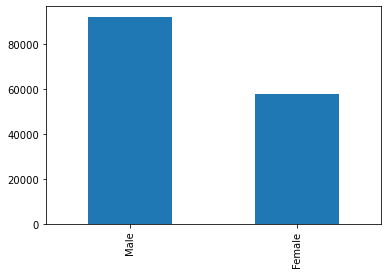

In [112]:
df_categorical['Gender'].value_counts().sort_values(ascending = False).plot.bar()

In [113]:
def fun1(df_categorical,var):
    de = df_categorical[var].mode()[0]
    df_categorical[var].fillna(de,inplace=True)
    
fun1(df_categorical,'Gender')

In [114]:
df_categorical['Gender'].isnull().sum()

0

In [115]:
df_categorical['Region'].isnull().sum()

2

In [116]:
df_categorical.Region.unique()

array(['South', 'North', 'West', 'East', 'Central', nan], dtype=object)

<AxesSubplot:>

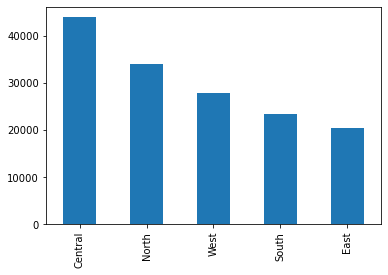

In [117]:
df_categorical.Region.value_counts().sort_values(ascending=False).plot.bar()

In [118]:
def fun2(df_categorical,var):
    de = df_categorical[var].mode()[0]
    df_categorical[var].fillna(de,inplace=True)
    
fun2(df_categorical,'Region')

In [119]:
df_categorical.Region.isnull().sum()

0

In [120]:
df_categorical['Region'].unique()

array(['South', 'North', 'West', 'East', 'Central'], dtype=object)

In [121]:
def fun3(df_categorical,var):
    de = df_categorical[var].mode()[0]
    df_categorical[var].fillna(de,inplace=True)
    
fun2(df_categorical,'Rented_OwnHouse')

In [122]:
df_categorical['Rented_OwnHouse'].isnull().sum()

0

In [123]:
df_categorical['Rented_OwnHouse'].unique()

array(['Ownhouse', 'Rented'], dtype=object)

In [124]:
def fun4(df_categorical,var):
    de = df_categorical[var].mode()[0]
    df_categorical[var].fillna(de,inplace=True)
    
fun2(df_categorical,'Occupation')

In [125]:
df_categorical['Occupation'].isnull().sum()

0

In [126]:
df_categorical['Occupation'].unique()

array(['Self_Emp', 'Officer1', 'Officer3', 'Non-officer', 'Officer2'],
      dtype=object)

In [127]:
def fun5(df_categorical,var):
    de = df_categorical[var].mode()[0]
    df_categorical[var].fillna(de,inplace=True)
    
fun2(df_categorical,'Education')

In [128]:
df_categorical['Education'].unique()

array(['Matric', 'Graduate', 'PhD', 'Professional', 'Post-Grad'],
      dtype=object)

In [129]:
df_categorical['Education'].isnull().sum()

0

<AxesSubplot:>

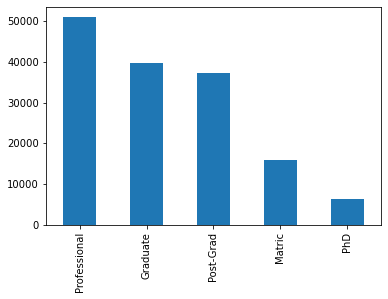

In [130]:
df_categorical['Education'].value_counts().sort_values(ascending = False).plot.bar()

In [131]:
df_categorical.isnull().sum()

Gender                   0
Region                   0
Rented_OwnHouse          0
Occupation               0
Education                0
NumberOfDependents    3924
dtype: int64

<AxesSubplot:>

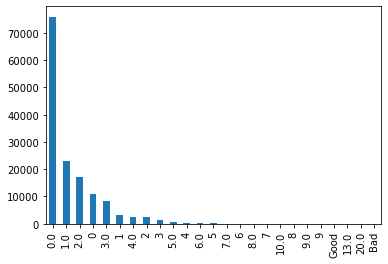

In [132]:
df_categorical.NumberOfDependents.value_counts().sort_values(ascending=False).plot.bar()

In [133]:
df_categorical.drop(['NumberOfDependents'],axis = 1,inplace =True)

In [134]:
df_categorical.columns

Index(['Gender', 'Region', 'Rented_OwnHouse', 'Occupation', 'Education'], dtype='object')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [136]:
df_categorical.isnull().sum()

Gender             0
Region             0
Rented_OwnHouse    0
Occupation         0
Education          0
dtype: int64

## Variable Transformation

In [137]:
df_numerical.columns

Index(['Good_Bad', 'NPA Status_median',
       'RevolvingUtilizationOfUnsecuredLines_median', 'age_median',
       'MonthlyIncome_median', 'NumberOfTime30-59DaysPastDueNotWorse_median',
       'NumberOfTime30-59DaysPastDueNotWorse_mode', 'DebtRatio_median',
       'MonthlyIncome.1_median', 'NumberOfOpenCreditLinesAndLoans_median',
       'NumberOfTimes90DaysLate_median', 'NumberRealEstateLoansOrLines_median',
       'NumberOfTime60-89DaysPastDueNotWorse_median'],
      dtype='object')

In [138]:
import scipy.stats as stats

In [139]:
# before transformation
def fun(df_numerical,feature):
    plt.figure(figsize = (15,7))
    plt.subplot(1,3,1)
    print(feature)
    df_numerical[feature].hist(bins = 30)
    
    plt.subplot(1,3,2)
    sns.distplot(df_numerical[feature])
    
    plt.subplot(1,3,3)
    stats.probplot(df_numerical[feature],dist='norm',plot = plt)
    plt.show()
    

Good_Bad


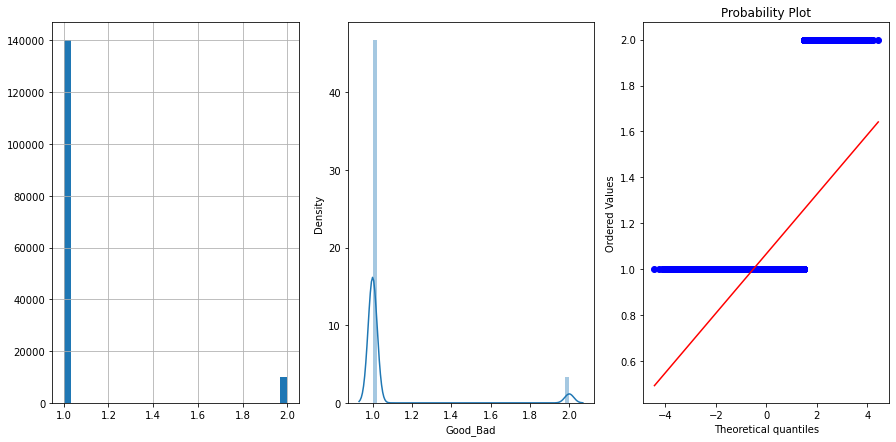

NPA Status_median


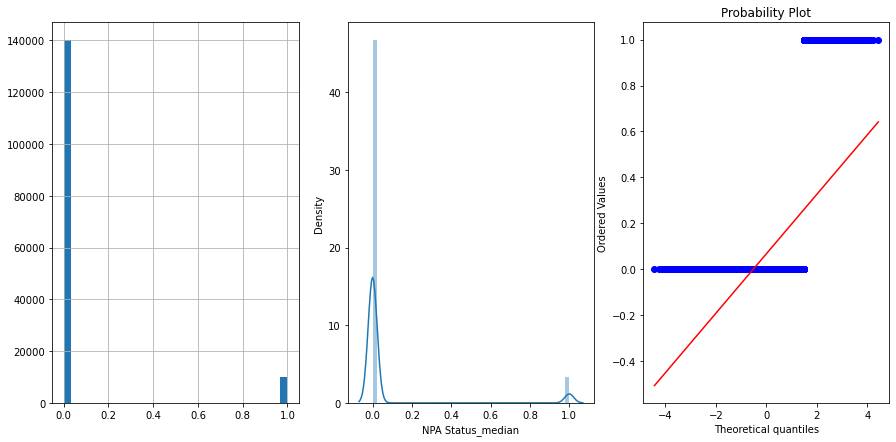

RevolvingUtilizationOfUnsecuredLines_median


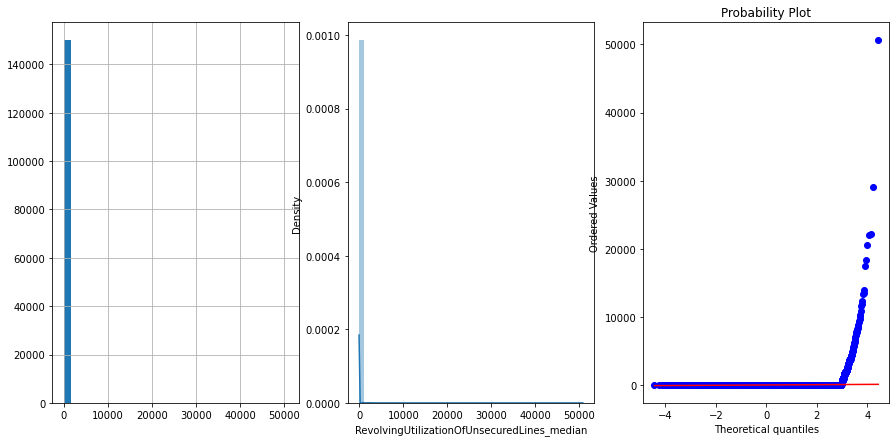

age_median


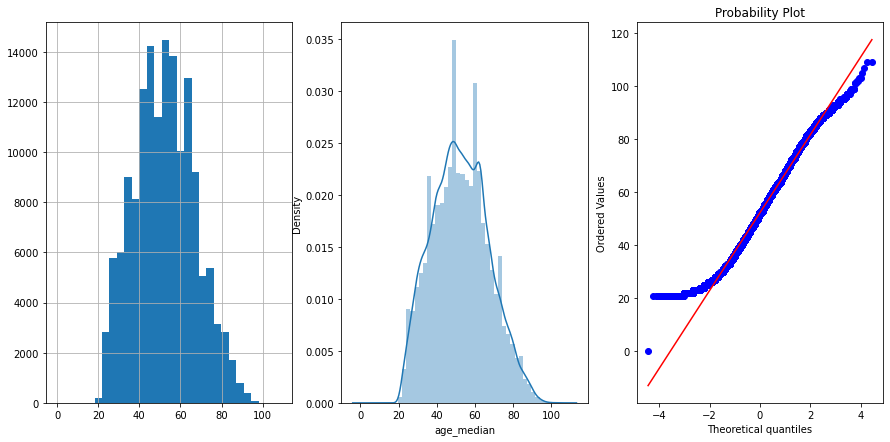

MonthlyIncome_median


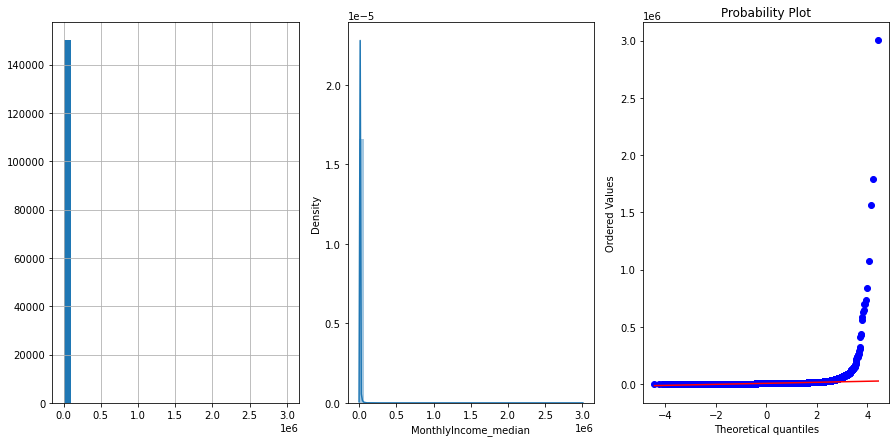

NumberOfTime30-59DaysPastDueNotWorse_median


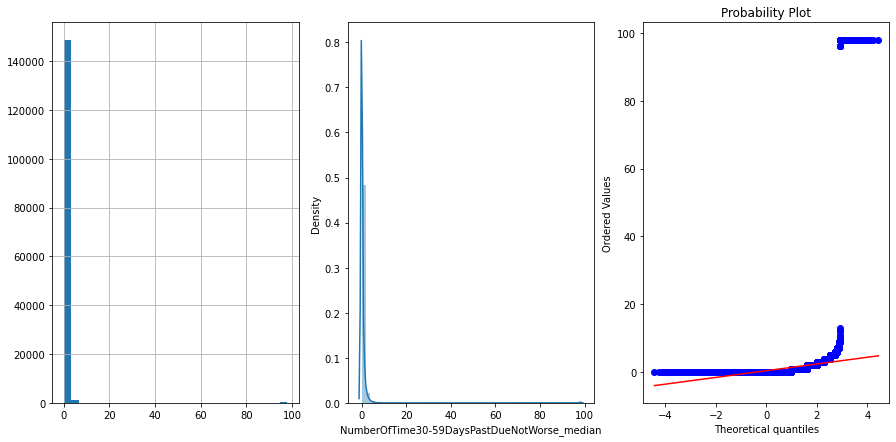

NumberOfTime30-59DaysPastDueNotWorse_mode


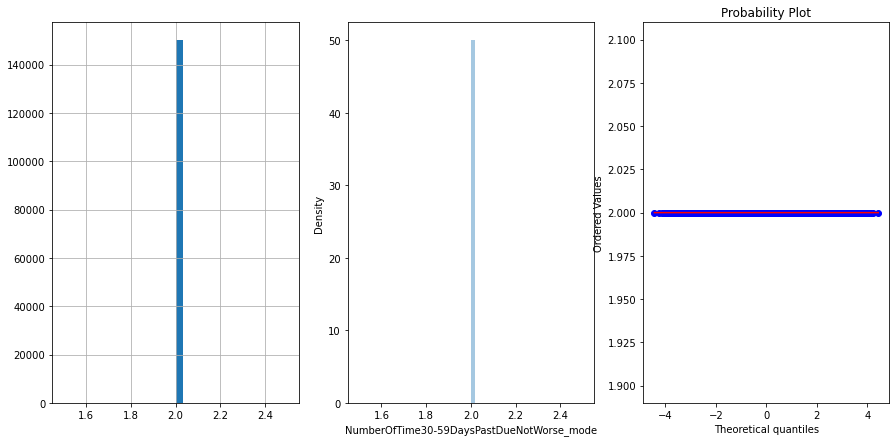

DebtRatio_median


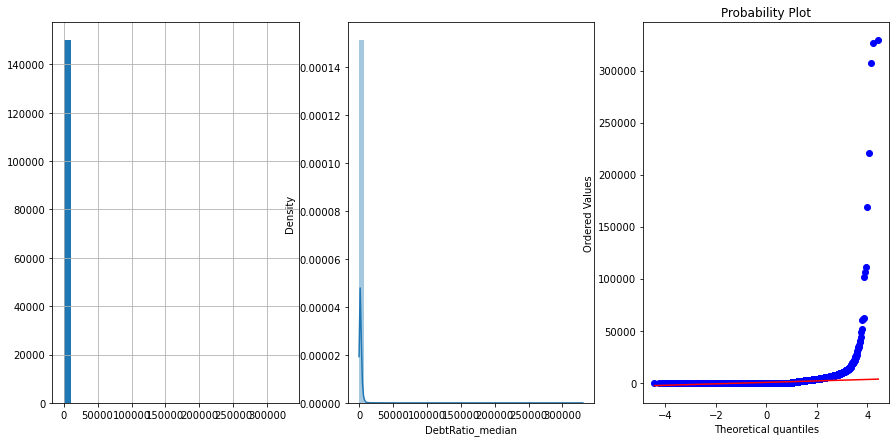

MonthlyIncome.1_median


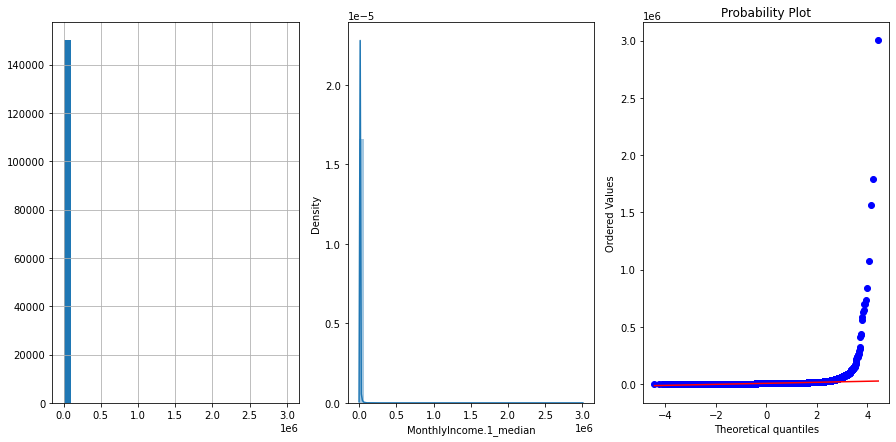

NumberOfOpenCreditLinesAndLoans_median


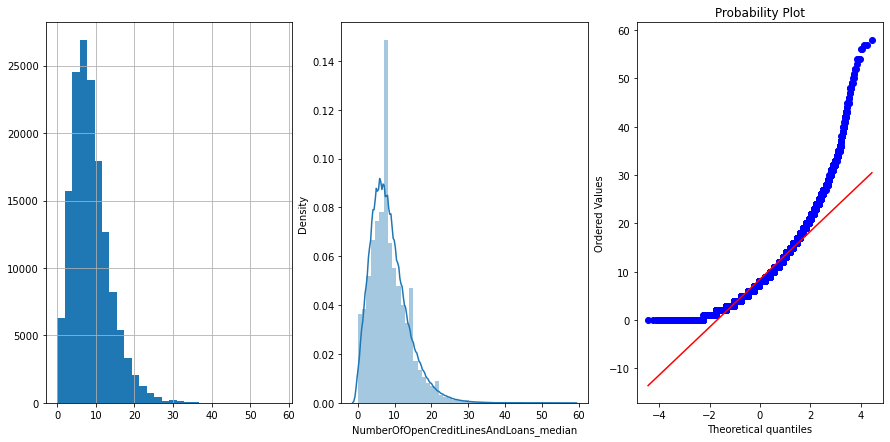

NumberOfTimes90DaysLate_median


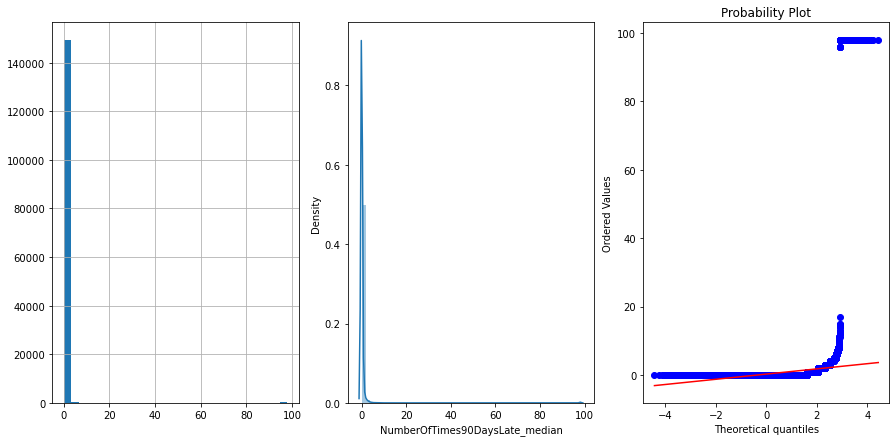

NumberRealEstateLoansOrLines_median


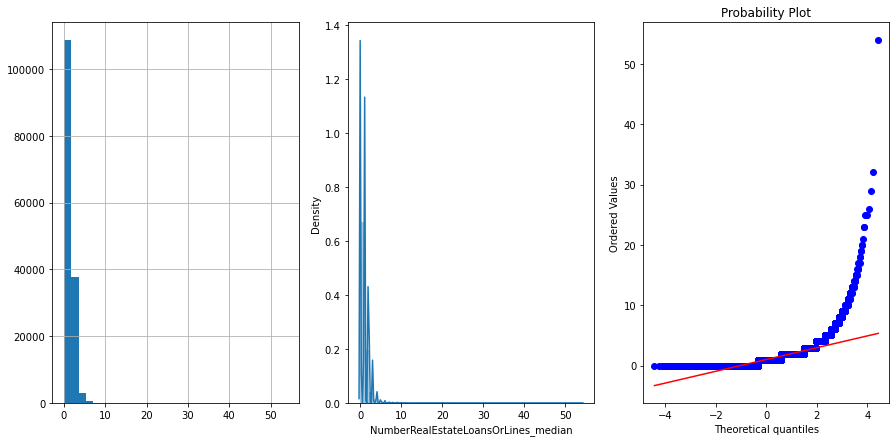

NumberOfTime60-89DaysPastDueNotWorse_median


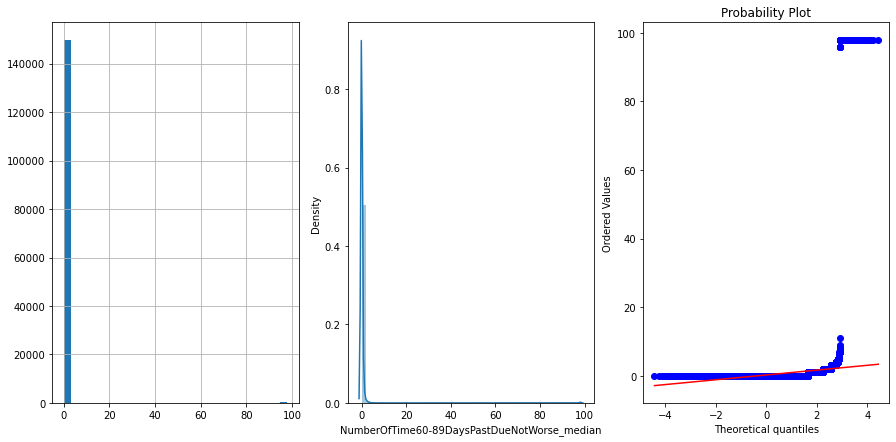

In [140]:
for feature in df_numerical.columns:
    fun(df_numerical,feature)

In [141]:
### After Transforming 

def fun1(df_numerical,feature):
    plt.figure(figsize = (15,7))
    plt.subplot(1,3,1)
    print(feature)
    df_numerical[feature].hist(bins = 30)
    
    plt.subplot(1,3,2)
    sns.distplot(df_numerical[feature])
    
    plt.subplot(1,3,3)
    stats.probplot(df_numerical[feature],dist='norm',plot = plt)
    plt.show()


Good_Bad


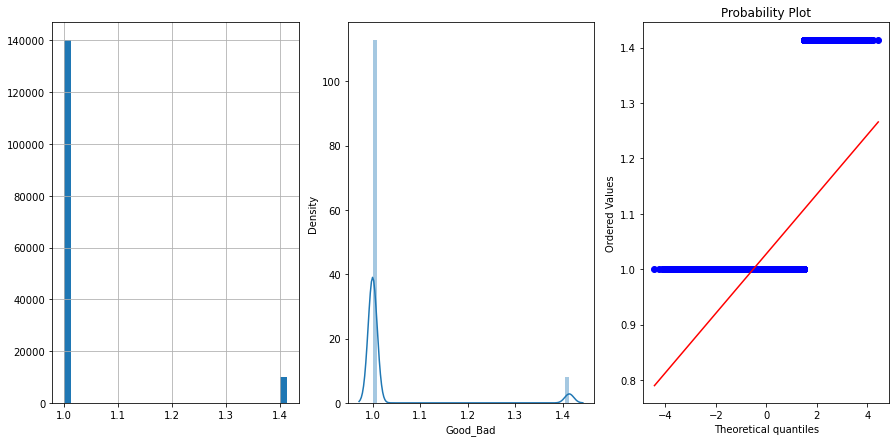

NPA Status_median


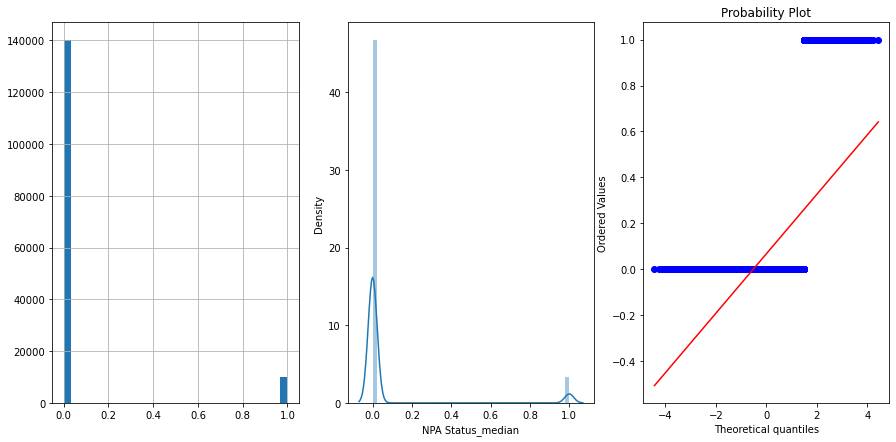

RevolvingUtilizationOfUnsecuredLines_median


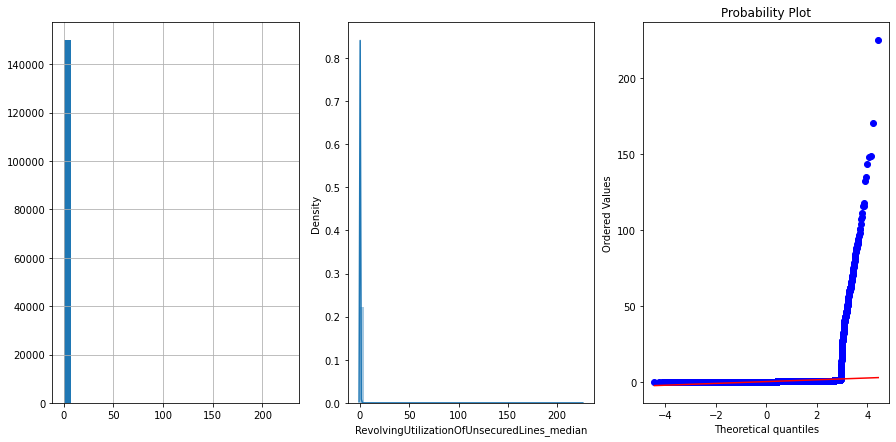

age_median


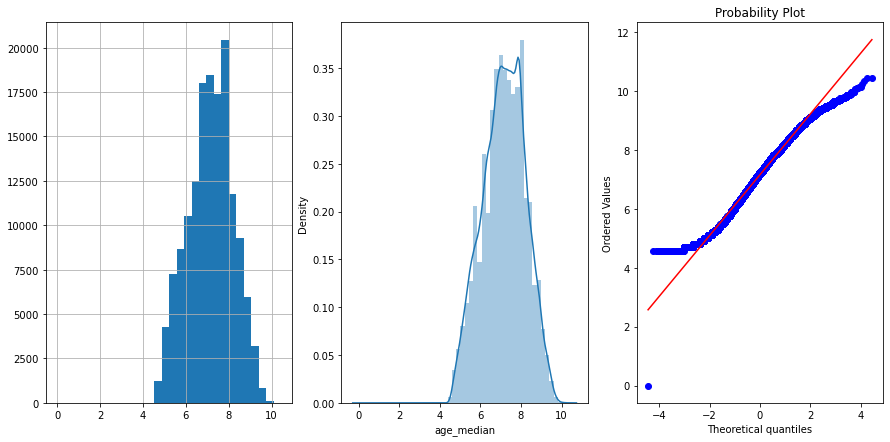

MonthlyIncome_median


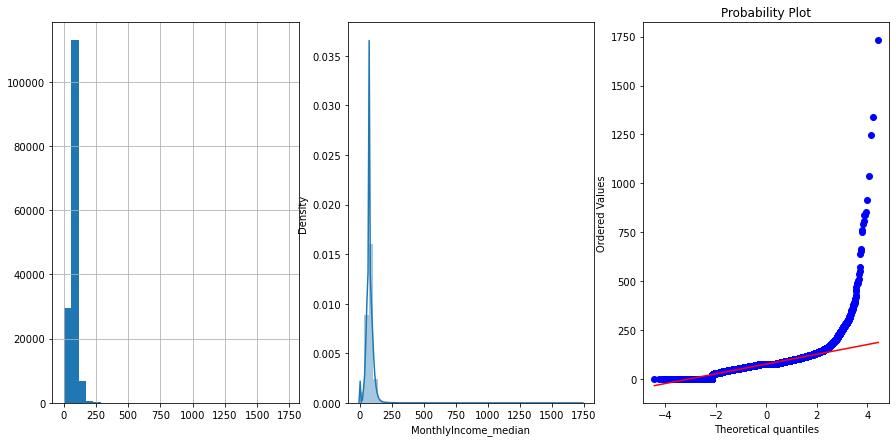

NumberOfTime30-59DaysPastDueNotWorse_median


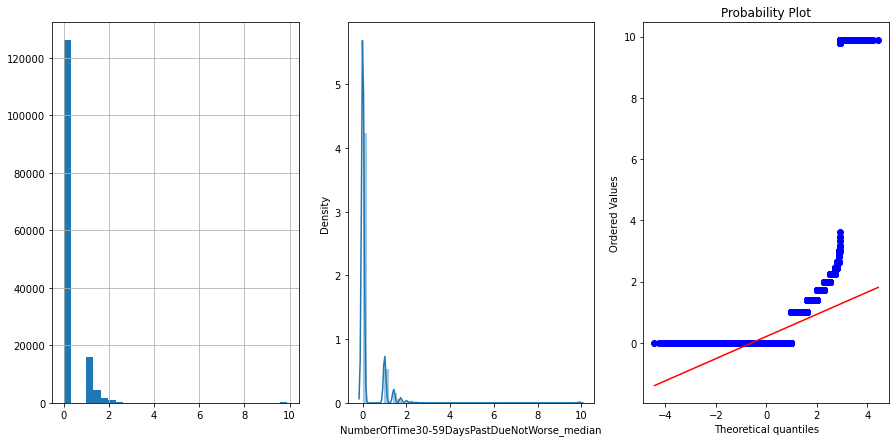

NumberOfTime30-59DaysPastDueNotWorse_mode


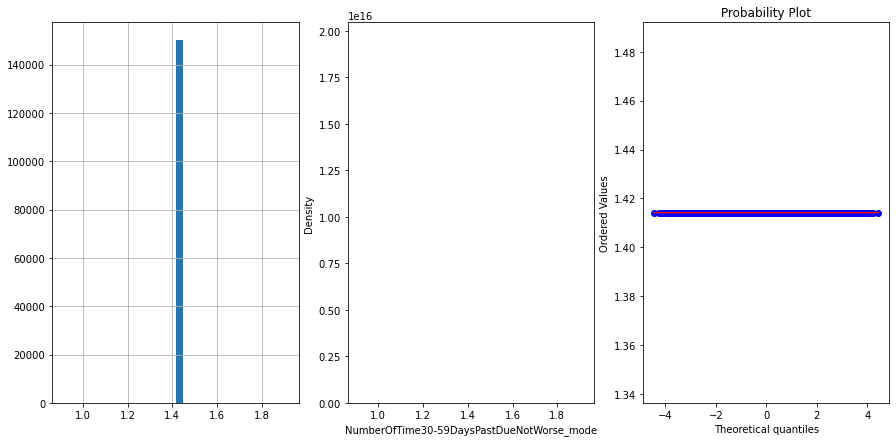

DebtRatio_median


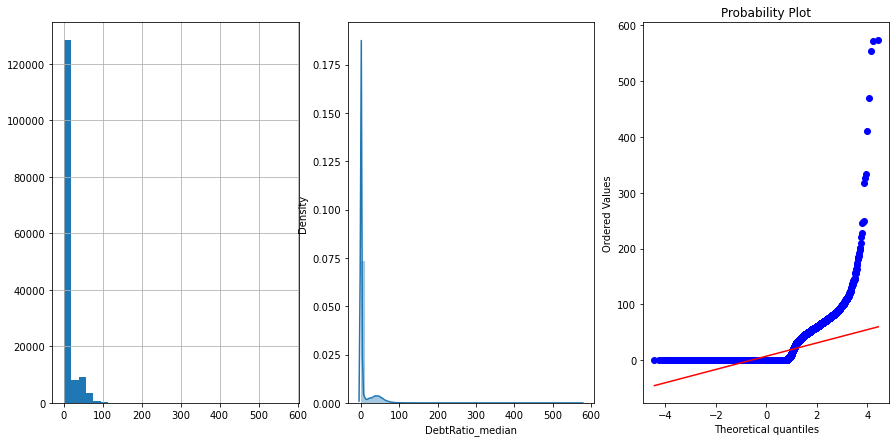

MonthlyIncome.1_median


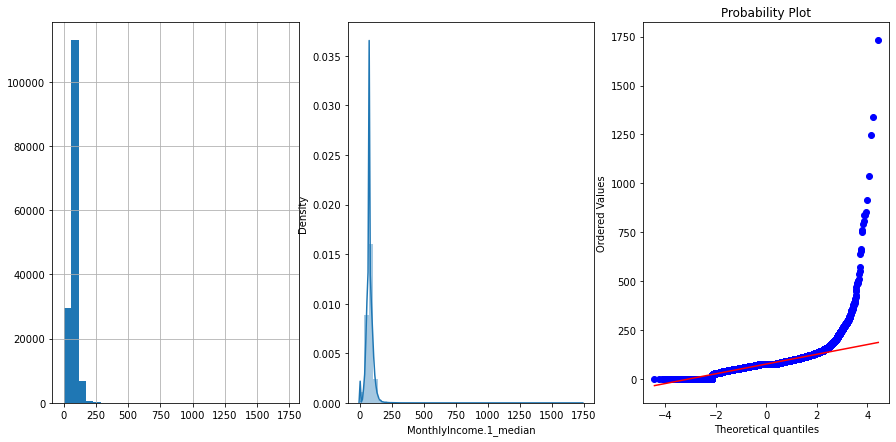

NumberOfOpenCreditLinesAndLoans_median


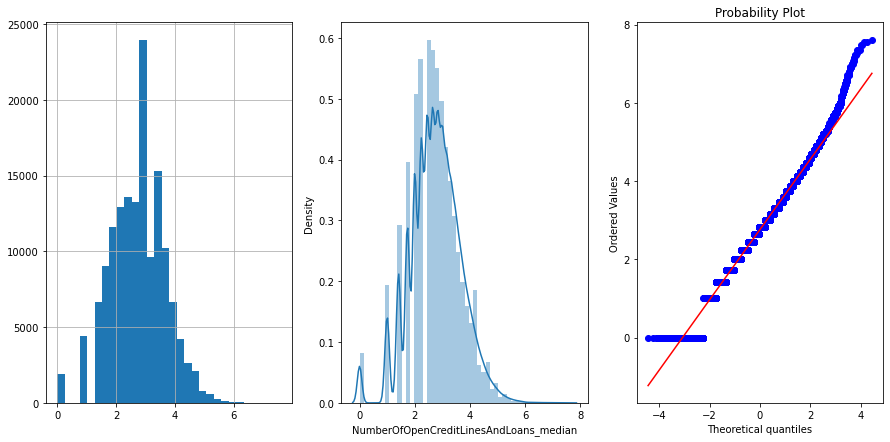

NumberOfTimes90DaysLate_median


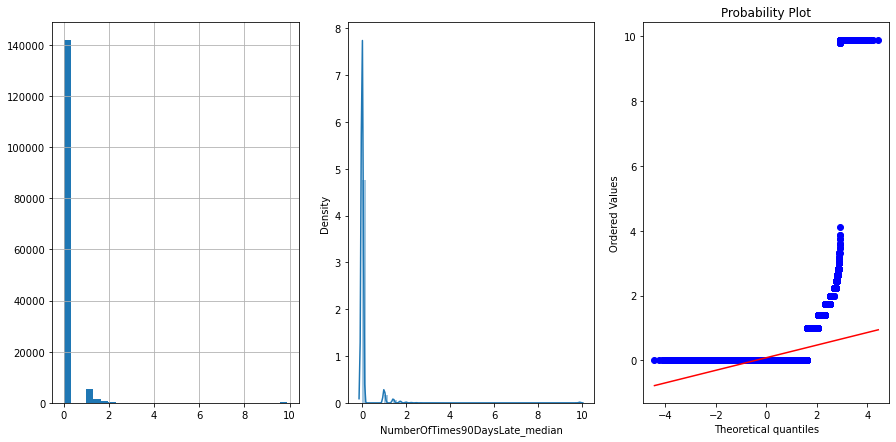

NumberRealEstateLoansOrLines_median


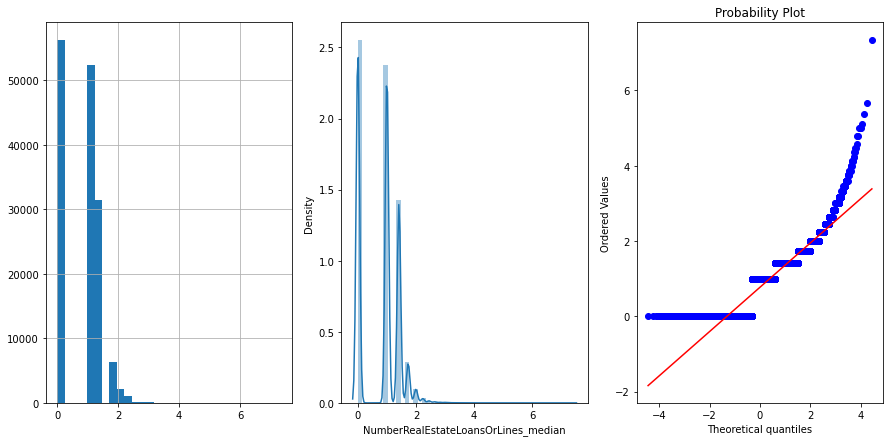

NumberOfTime60-89DaysPastDueNotWorse_median


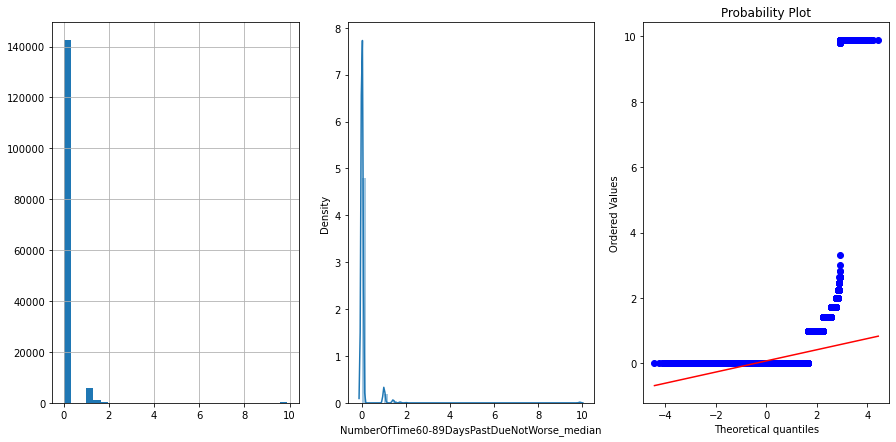

In [142]:
for j in df_numerical.columns:
    df_numerical[j] = np.sqrt(df_numerical[j])
    fun1(df_numerical,j)

## Feature scalling

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
sc = StandardScaler()

In [145]:
for i in df_numerical.columns:
    df_numerical[i] = df_numerical[i].values.reshape(-1,1)

In [146]:
df_numerical_scal = sc.fit_transform(df_numerical)

In [147]:
df_numerical_scaler = pd.DataFrame(df_numerical_scal,columns=df_numerical.columns)

In [148]:
df_numerical_scaler.head(10)

,Good_Bad,NPA Status_median,RevolvingUtilizationOfUnsecuredLines_median,age_median,MonthlyIncome_median,NumberOfTime30-59DaysPastDueNotWorse_median,NumberOfTime30-59DaysPastDueNotWorse_mode,DebtRatio_median,MonthlyIncome.1_median,NumberOfOpenCreditLinesAndLoans_median,NumberOfTimes90DaysLate_median,NumberRealEstateLoansOrLines_median,NumberOfTime60-89DaysPastDueNotWorse_median
0,3.736482,3.736482,0.139710,-0.432229,0.734414,1.962836,-4.440892e-16,-0.378832,0.734414,0.931089,-0.165488,2.583999,-0.149673
1,-0.267631,-0.267631,0.182662,-0.801956,-0.875359,-0.337371,-4.440892e-16,-0.410531,-0.875359,-0.843016,-0.165488,-1.190949,-0.149673
2,-0.267631,-0.267631,0.113035,-0.956286,-0.724752,1.289121,-4.440892e-16,-0.413856,-0.724752,-1.490299,1.799911,-1.190949,-0.149673
3,-0.267631,-0.267631,-0.023565,-1.618538,-0.641881,-0.337371,-4.440892e-16,-0.419760,-0.641881,-0.582165,-0.165488,-1.190949,-0.149673
4,-0.267631,-0.267631,0.171888,-0.151022,6.400743,1.289121,-4.440892e-16,-0.421613,6.400743,-0.129472,-0.165488,0.350167,-0.149673
5,-0.267631,-0.267631,-0.032662,1.393159,-0.579847,-0.337371,-4.440892e-16,-0.395246,-0.579847,-1.139095,-0.165488,0.350167,-0.149673
6,-0.267631,-0.267631,0.005338,0.378860,-0.061783,-0.337371,-4.440892e-16,3.948405,-0.061783,0.072381,-0.165488,1.478343,-0.149673
7,-0.267631,-0.267631,0.136923,-0.878627,-0.579847,-0.337371,-4.440892e-16,-0.404209,-0.579847,0.072381,-0.165488,-1.190949,-0.149673
8,-0.267631,-0.267631,-0.082565,-1.889412,-0.061783,-0.337371,-4.440892e-16,-0.037709,-0.061783,-1.490299,-0.165488,-1.190949,-0.149673
9,-0.267631,-0.267631,-0.043822,0.378860,2.846517,-0.337371,-4.440892e-16,-0.385638,2.846517,0.261966,-0.165488,1.891284,-0.149673


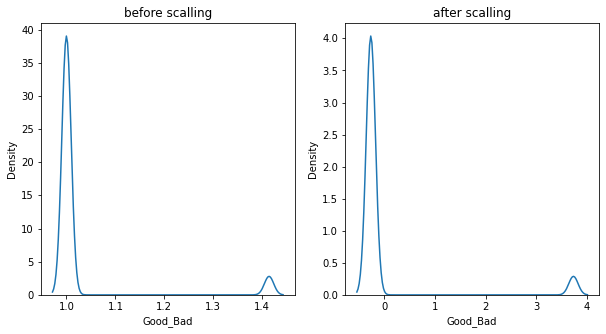

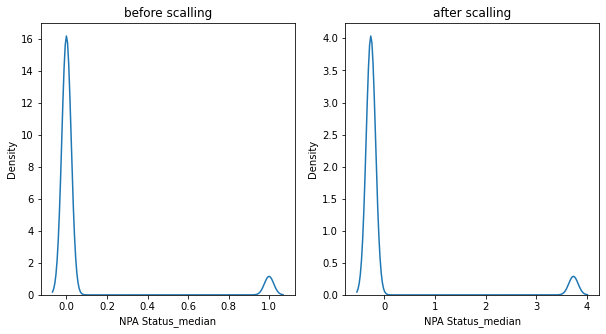

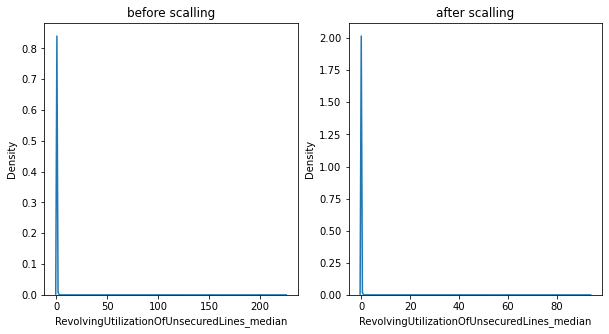

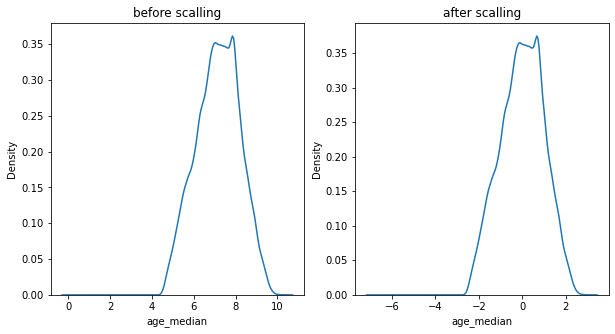

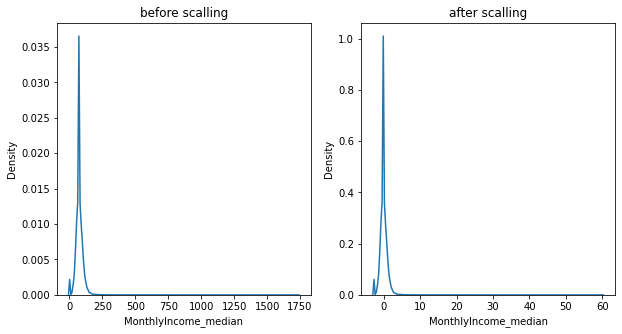

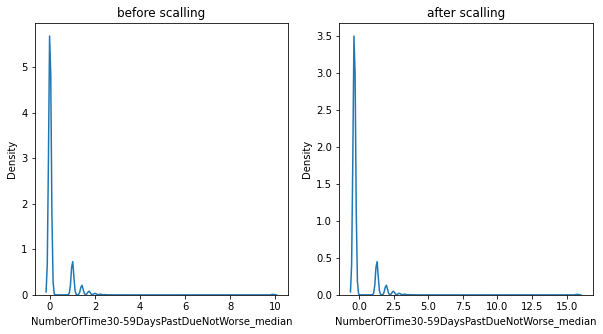

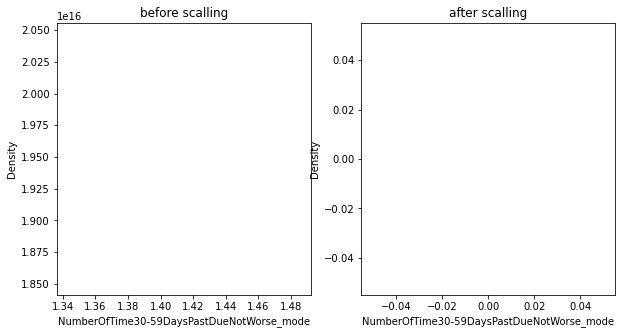

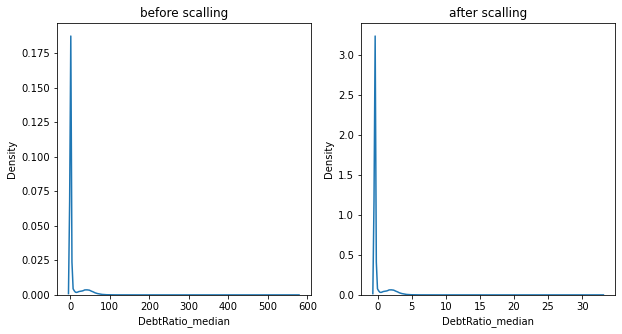

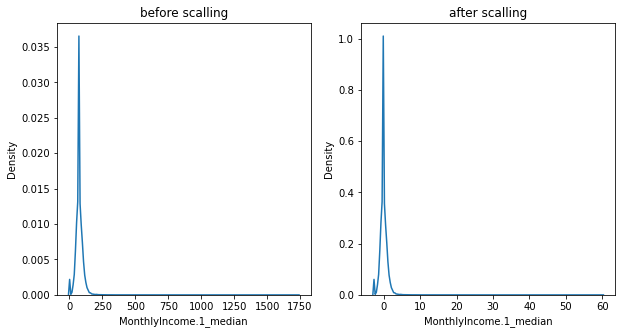

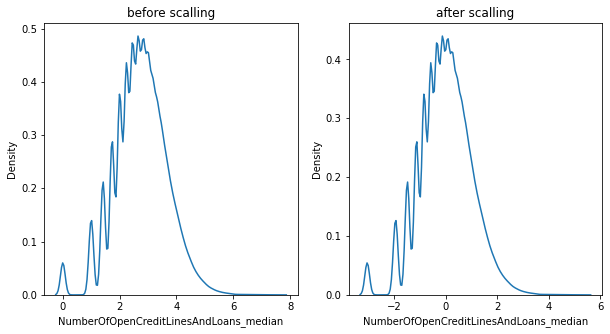

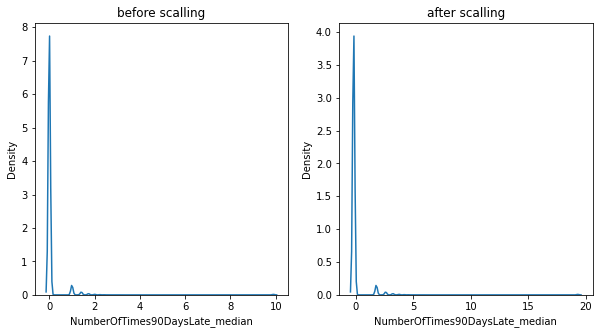

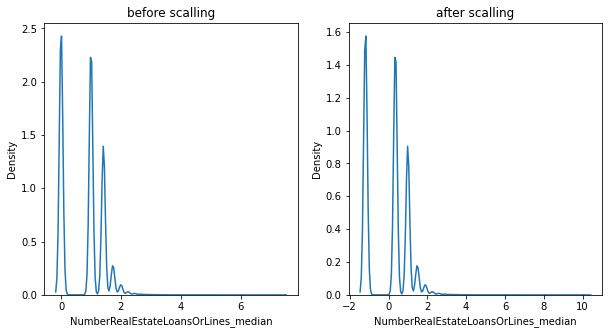

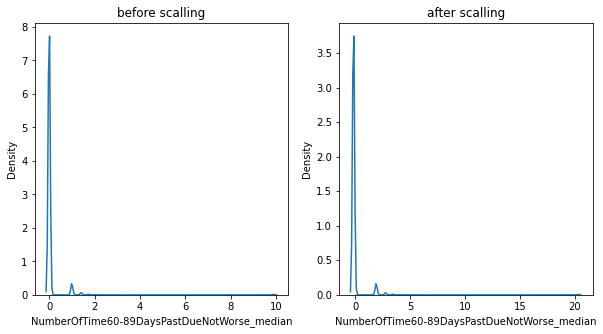

In [149]:
for i in df_numerical_scaler.columns:
    fig = plt.figure(figsize=(10,5))
    ax1 =fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    plt.title(i)
    ax1.set_title('before scalling')
    sns.kdeplot(df_numerical[i],ax=ax1)
    
    
    ax2.set_title('after scalling')
    sns.kdeplot(df_numerical_scaler[i],ax=ax2)
    
plt.show()

In [150]:
df_numerical_scaler.columns

Index(['Good_Bad', 'NPA Status_median',
       'RevolvingUtilizationOfUnsecuredLines_median', 'age_median',
       'MonthlyIncome_median', 'NumberOfTime30-59DaysPastDueNotWorse_median',
       'NumberOfTime30-59DaysPastDueNotWorse_mode', 'DebtRatio_median',
       'MonthlyIncome.1_median', 'NumberOfOpenCreditLinesAndLoans_median',
       'NumberOfTimes90DaysLate_median', 'NumberRealEstateLoansOrLines_median',
       'NumberOfTime60-89DaysPastDueNotWorse_median'],
      dtype='object')


## Handling  Outliers

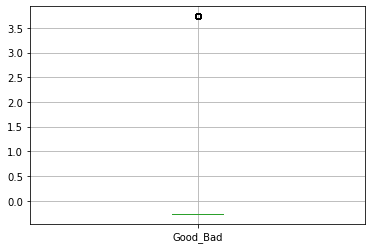

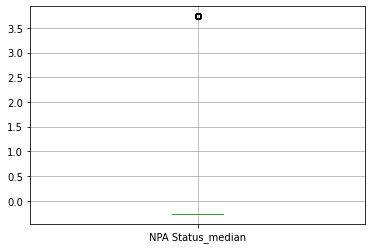

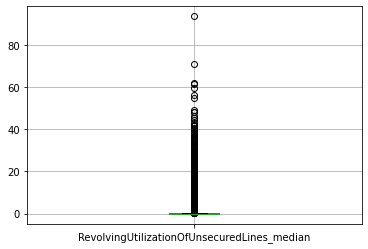

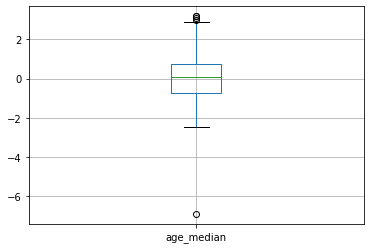

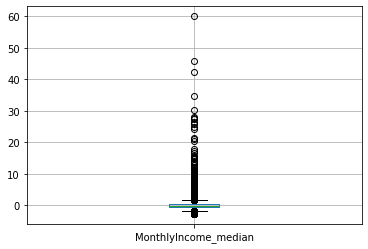

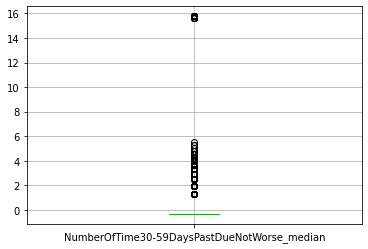

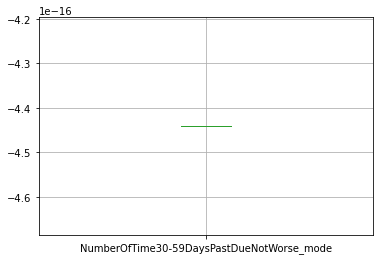

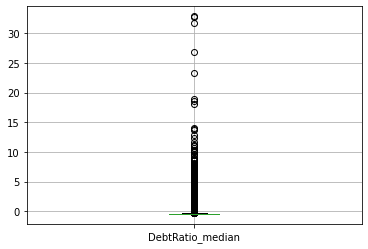

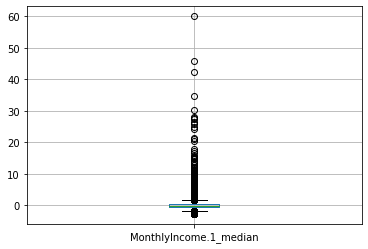

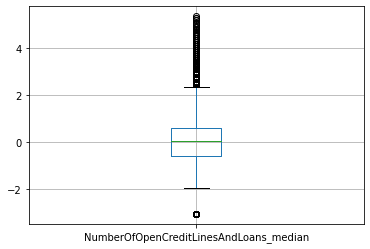

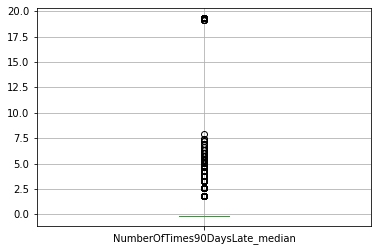

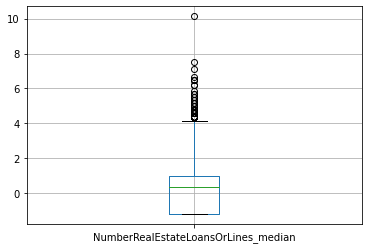

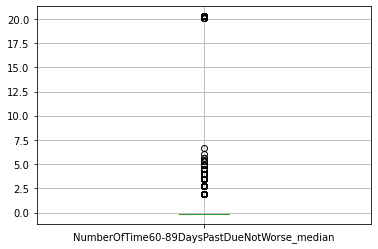

In [151]:
for i in df_numerical_scaler.columns:
    df_numerical_scaler[[i]].boxplot()
    plt.show()

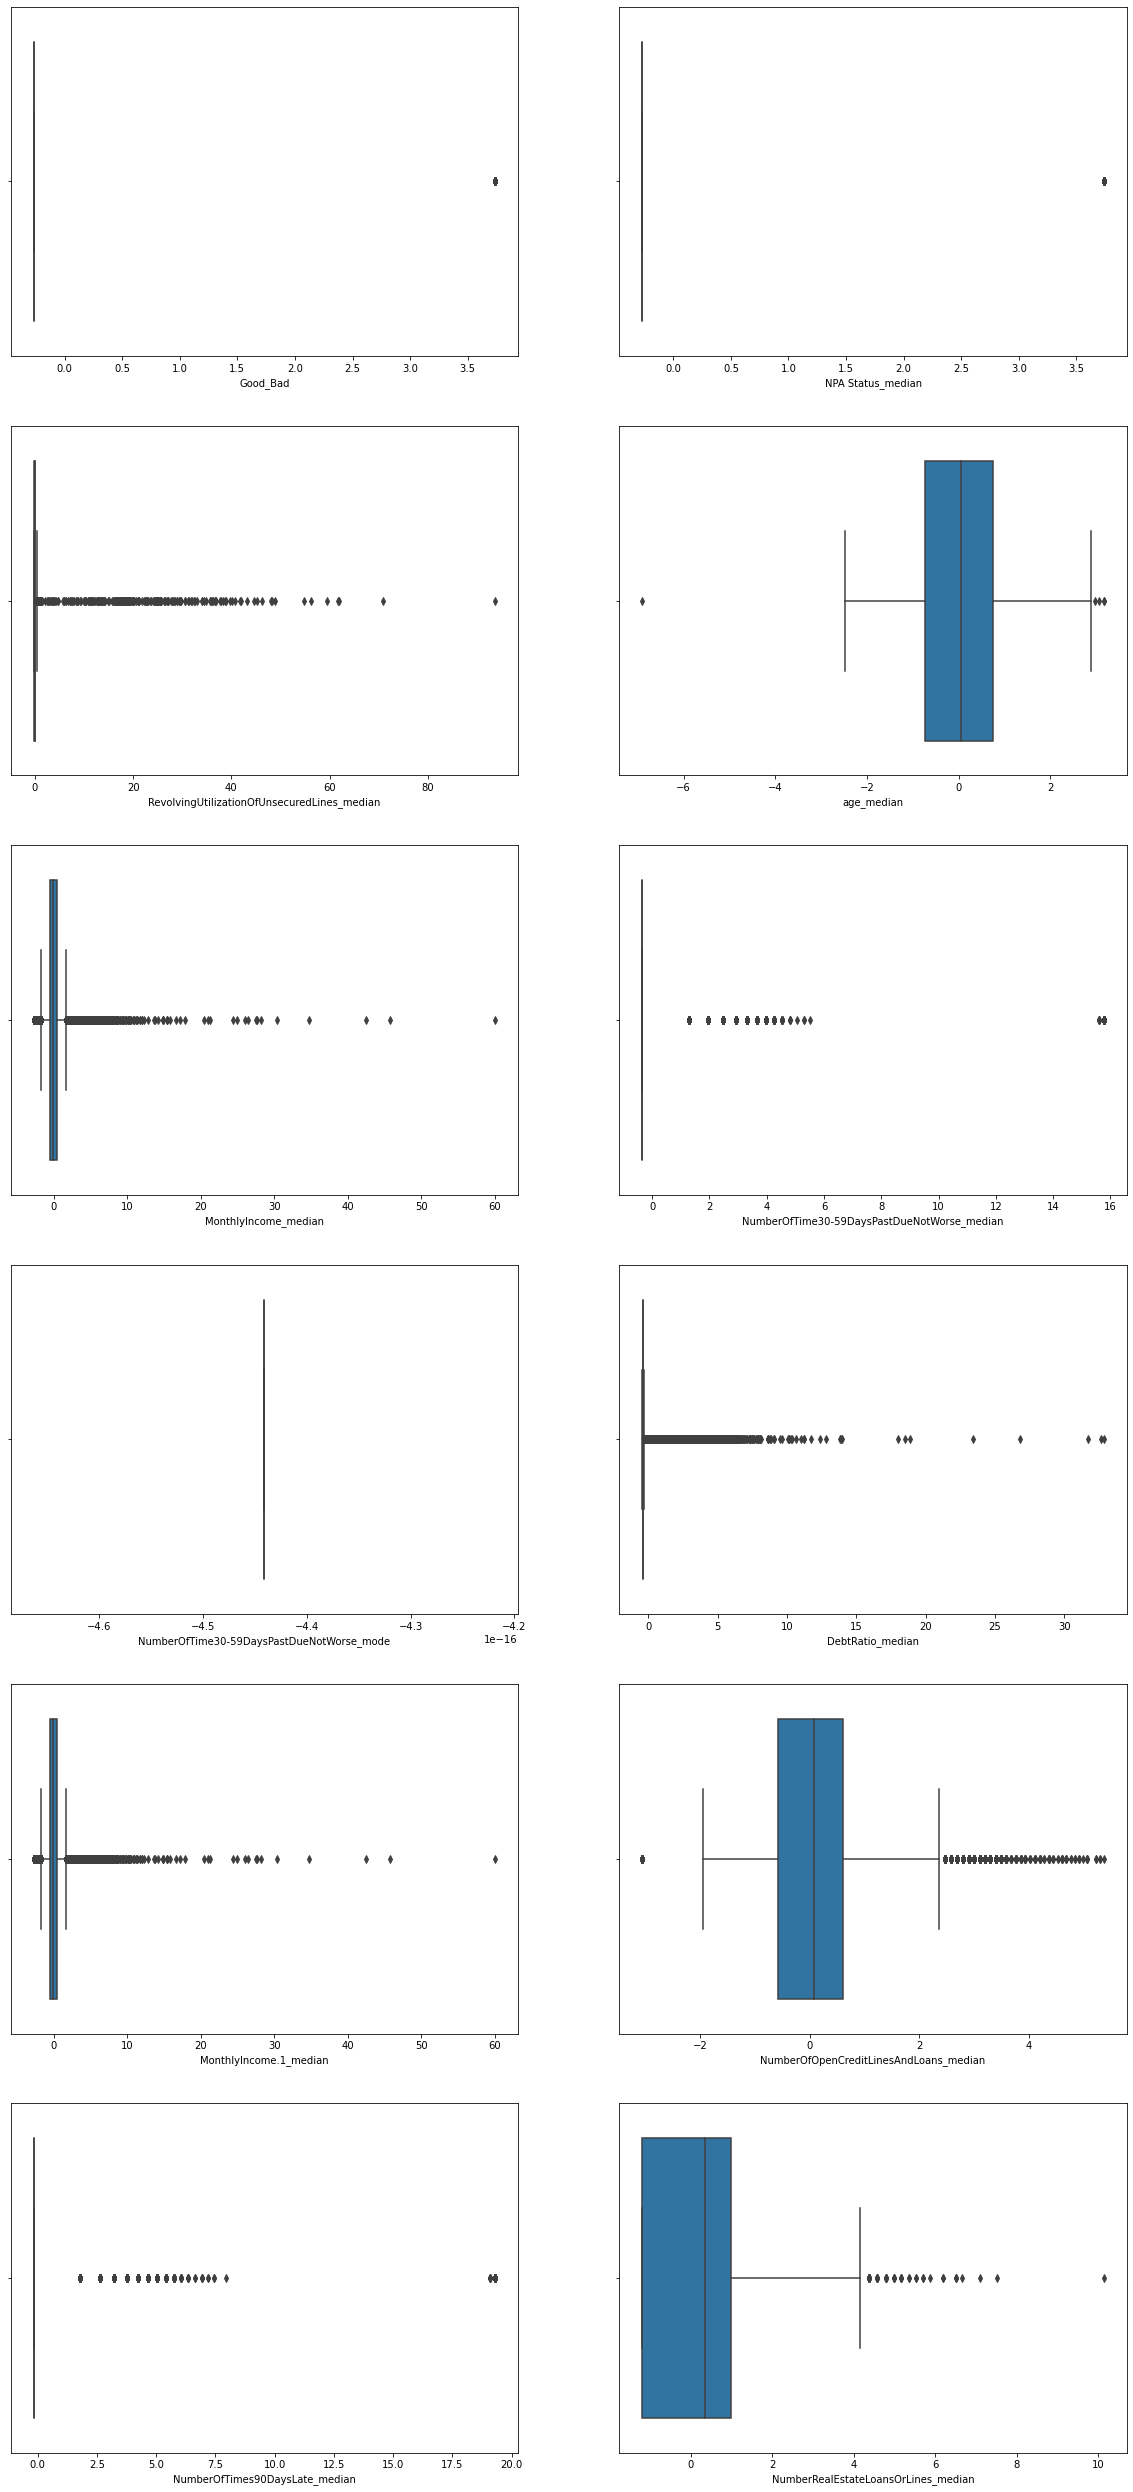

In [152]:
checking = df_numerical_scaler.columns

fig , ax = plt.subplots(6,2, figsize = (20,45))
for i , subplot in zip(checking,ax.flatten()):
    sns.boxplot(df_numerical_scaler[i],ax = subplot)
    

In [153]:
def outliers(df_numerical_scaler,var):
    upper = df_numerical_scaler[var].quantile(0.95)
    lower = df_numerical_scaler[var].quantile(0.05)
    
    df_numerical_scaler[var] = np.where(df_numerical_scaler[var] > upper , upper , 
                         np.where(df_numerical_scaler[var] < lower , lower , df_numerical_scaler[var]))

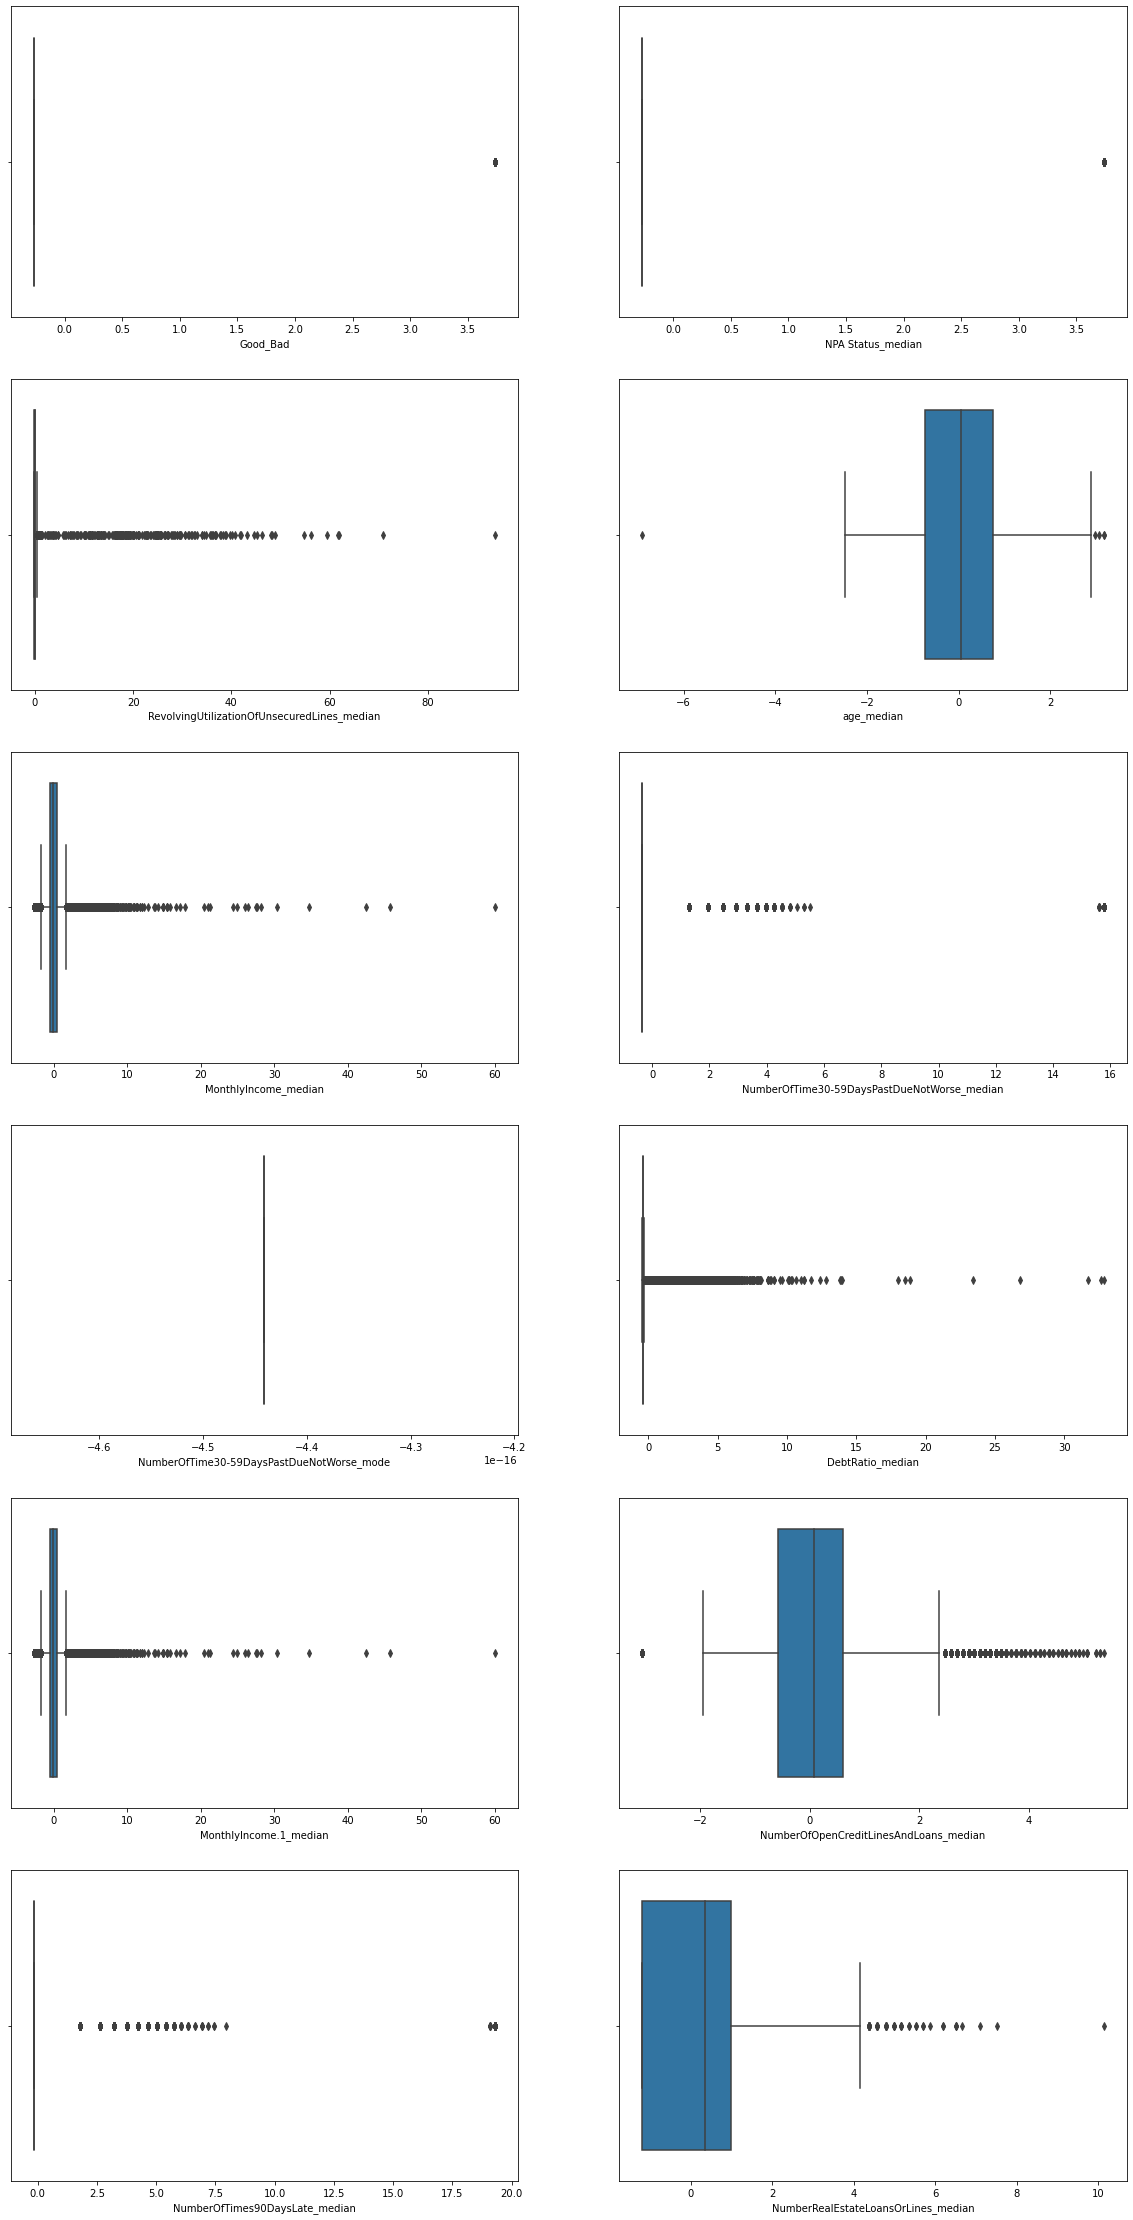

In [154]:
checking = df_numerical_scaler.columns

fig , ax = plt.subplots(6,2, figsize = (20,40))
for i , subplot in zip(checking,ax.flatten()):
    sns.boxplot(df_numerical_scaler[i],ax = subplot)

In [155]:
df_numerical_scaler.shape

(150002, 13)

### Feature Selection For Numerical Data

### Constant

In [156]:
from sklearn.feature_selection import VarianceThreshold

In [157]:
reg = VarianceThreshold(threshold=0.0)

In [158]:
reg.fit(df_numerical_scaler)

VarianceThreshold()

In [159]:
sum(reg.get_support())

12

## Quasi constant

In [160]:
from sklearn.feature_selection import VarianceThreshold

In [161]:
reg = VarianceThreshold(threshold=0.1)

In [162]:
reg.fit(df_numerical_scaler)

VarianceThreshold(threshold=0.1)

In [163]:
sum(reg.get_support())

12

### Duplicate

In [164]:
numerical_scaled_t = df_numerical_scaler.T

In [165]:
numerical_scaled_t.duplicated().sum()

1

In [166]:
dup = numerical_scaled_t.duplicated()

In [167]:
f = [not i for i in dup]

In [168]:
numerical = numerical_scaled_t[f].T

In [169]:
numerical.head()

,Good_Bad,NPA Status_median,RevolvingUtilizationOfUnsecuredLines_median,age_median,MonthlyIncome_median,NumberOfTime30-59DaysPastDueNotWorse_median,NumberOfTime30-59DaysPastDueNotWorse_mode,DebtRatio_median,NumberOfOpenCreditLinesAndLoans_median,NumberOfTimes90DaysLate_median,NumberRealEstateLoansOrLines_median,NumberOfTime60-89DaysPastDueNotWorse_median
0,3.736482,3.736482,0.139710,-0.432229,0.734414,1.962836,-4.440892e-16,-0.378832,0.931089,-0.165488,2.583999,-0.149673
1,-0.267631,-0.267631,0.182662,-0.801956,-0.875359,-0.337371,-4.440892e-16,-0.410531,-0.843016,-0.165488,-1.190949,-0.149673
2,-0.267631,-0.267631,0.113035,-0.956286,-0.724752,1.289121,-4.440892e-16,-0.413856,-1.490299,1.799911,-1.190949,-0.149673
3,-0.267631,-0.267631,-0.023565,-1.618538,-0.641881,-0.337371,-4.440892e-16,-0.419760,-0.582165,-0.165488,-1.190949,-0.149673
4,-0.267631,-0.267631,0.171888,-0.151022,6.400743,1.289121,-4.440892e-16,-0.421613,-0.129472,-0.165488,0.350167,-0.149673


In [170]:
numerical.shape

(150002, 12)

### Correleation with feature engine

In [171]:
from feature_engine.selection import DropCorrelatedFeatures

In [172]:
reg = DropCorrelatedFeatures(threshold=0.8 , method= 'pearson', missing_values='ignore')

In [173]:
reg.fit(numerical)

DropCorrelatedFeatures()

In [174]:
reg.features_to_drop_

{'NPA Status_median'}

In [175]:
reg.correlated_feature_sets_

[{'Good_Bad', 'NPA Status_median'}]

In [176]:
numerical = reg.transform(numerical)

In [177]:
numerical.shape

(150002, 11)

### Handiling Categorical Data

In [178]:
df_categorical.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
0,Male,South,Ownhouse,Self_Emp,Matric
1,Female,South,Ownhouse,Self_Emp,Graduate
2,Female,South,Ownhouse,Self_Emp,PhD
3,Female,South,Ownhouse,Self_Emp,Professional
4,Male,South,Ownhouse,Self_Emp,Post-Grad


In [179]:
for feature in df_categorical.columns:
    print('the feature  are-',feature,'and number of categorical are ',len(df_categorical[feature].unique()))

the feature  are- Gender and number of categorical are  2
the feature  are- Region and number of categorical are  5
the feature  are- Rented_OwnHouse and number of categorical are  2
the feature  are- Occupation and number of categorical are  5
the feature  are- Education and number of categorical are  5


In [180]:
Gender_dummy = pd.get_dummies(df_categorical['Gender'],drop_first=True)
Region_dummy = pd.get_dummies(df_categorical['Region'],drop_first=True)
Rented_OwnHouse_dummy = pd.get_dummies(df_categorical['Rented_OwnHouse'],drop_first=True)
Occupation_Dummy = pd.get_dummies(df_categorical['Occupation'],drop_first=True)


In [181]:
Gender_dummy.head()

,Male
0,1
1,0
2,0
3,0
4,1


In [182]:
Region_dummy.head()

,East,North,South,West
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [183]:
Rented_OwnHouse_dummy.head()

,Rented
0,0
1,0
2,0
3,0
4,0


In [184]:
Occupation_Dummy.head()

,Officer1,Officer2,Officer3,Self_Emp
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [185]:
df_categorical.Region.value_counts()

Central    43958
North      34099
West       27899
South      23495
East       20551
Name: Region, dtype: int64

In [186]:
df_categorical.head()

,Gender,Region,Rented_OwnHouse,Occupation,Education
0,Male,South,Ownhouse,Self_Emp,Matric
1,Female,South,Ownhouse,Self_Emp,Graduate
2,Female,South,Ownhouse,Self_Emp,PhD
3,Female,South,Ownhouse,Self_Emp,Professional
4,Male,South,Ownhouse,Self_Emp,Post-Grad


In [187]:
df_categorical.drop(['Gender','Region','Rented_OwnHouse','Occupation'],axis=1,inplace=True)

In [188]:
df_categorical.head()

,Education
0,Matric
1,Graduate
2,PhD
3,Professional
4,Post-Grad


### Label Encoder

In [189]:
from sklearn.preprocessing import LabelEncoder

In [190]:
lb = LabelEncoder()

In [191]:
b1 = df_categorical.apply(lb.fit_transform)

In [192]:
b1.head()

,Education
0,1
1,0
2,2
3,4
4,3


In [193]:
b1['Education'].unique()

array([1, 0, 2, 4, 3])

In [194]:
b1 = pd.concat([b1,Gender_dummy,Region_dummy,Rented_OwnHouse_dummy,Occupation_Dummy],axis=1,)

In [195]:
b1.head()

,Education,Male,East,North,South,West,Rented,Officer1,Officer2,Officer3,Self_Emp
0,1,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,1
4,3,1,0,0,1,0,0,0,0,0,1


In [196]:
X = b1.iloc[:,0:]

In [197]:
X.head()

,Education,Male,East,North,South,West,Rented,Officer1,Officer2,Officer3,Self_Emp
0,1,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,1
4,3,1,0,0,1,0,0,0,0,0,1


### Chiz square Test

In [198]:
from sklearn.feature_selection import chi2
chi_squres = chi2(X,y)

In [199]:
chi_squres

(array([2.18907731e+02, 1.35577727e+00, 3.49803704e+02, 6.05487098e+01,
        1.78015120e-03, 5.15575167e+03, 7.34176938e-01, 6.90114613e-01,
        1.81348021e+00, 2.14039167e-01, 7.57934111e-02]),
 array([1.56544549e-49, 2.44270661e-01, 4.67612254e-78, 7.17801243e-15,
        9.66345769e-01, 0.00000000e+00, 3.91532622e-01, 4.06125399e-01,
        1.78091309e-01, 6.43619800e-01, 7.83081131e-01]))

In [200]:
p_values = pd.Series(chi_squres[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

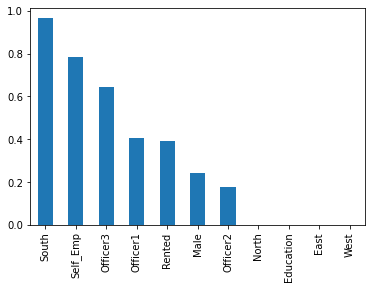

In [201]:
p_values.plot.bar()

In [202]:
p_values

South        9.663458e-01
Self_Emp     7.830811e-01
Officer3     6.436198e-01
Officer1     4.061254e-01
Rented       3.915326e-01
Male         2.442707e-01
Officer2     1.780913e-01
North        7.178012e-15
Education    1.565445e-49
East         4.676123e-78
West         0.000000e+00
dtype: float64

In [203]:
c = []
for i , j in enumerate(p_values):
    if j < 0.05:
        c.append(p_values.index[i])

In [204]:
c

['North', 'Education', 'East', 'West']

In [205]:
X.head()

,Education,Male,East,North,South,West,Rented,Officer1,Officer2,Officer3,Self_Emp
0,1,1,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,1
2,2,0,0,0,1,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,1
4,3,1,0,0,1,0,0,0,0,0,1


In [206]:
categorical = X[['North', 'Education', 'East', 'West']]

In [207]:
categorical[:5]

,North,Education,East,West
0,0,1,0,0
1,0,0,0,0
2,0,2,0,0
3,0,4,0,0
4,0,3,0,0


In [208]:
data = pd.concat([numerical,categorical,y], axis = 1)

In [209]:
data.head()

,Good_Bad,RevolvingUtilizationOfUnsecuredLines_median,age_median,MonthlyIncome_median,NumberOfTime30-59DaysPastDueNotWorse_median,NumberOfTime30-59DaysPastDueNotWorse_mode,DebtRatio_median,NumberOfOpenCreditLinesAndLoans_median,NumberOfTimes90DaysLate_median,NumberRealEstateLoansOrLines_median,NumberOfTime60-89DaysPastDueNotWorse_median,North,Education,East,West,Good_Bad
0,3.736482,0.139710,-0.432229,0.734414,1.962836,-4.440892e-16,-0.378832,0.931089,-0.165488,2.583999,-0.149673,0,1,0,0,2
1,-0.267631,0.182662,-0.801956,-0.875359,-0.337371,-4.440892e-16,-0.410531,-0.843016,-0.165488,-1.190949,-0.149673,0,0,0,0,1
2,-0.267631,0.113035,-0.956286,-0.724752,1.289121,-4.440892e-16,-0.413856,-1.490299,1.799911,-1.190949,-0.149673,0,2,0,0,1
3,-0.267631,-0.023565,-1.618538,-0.641881,-0.337371,-4.440892e-16,-0.419760,-0.582165,-0.165488,-1.190949,-0.149673,0,4,0,0,1
4,-0.267631,0.171888,-0.151022,6.400743,1.289121,-4.440892e-16,-0.421613,-0.129472,-0.165488,0.350167,-0.149673,0,3,0,0,1


In [210]:
data.shape

(150002, 16)

<AxesSubplot:xlabel='Good_Bad', ylabel='count'>

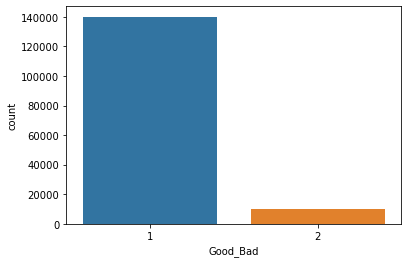

In [211]:
sns.countplot(y)

## Spliting data into train and test

In [212]:
from sklearn.model_selection import train_test_split

In [213]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [215]:
X_train.shape ,  y_train.shape

((100501, 15), (100501,))

In [216]:
X_test.shape  , y_test.shape

((49501, 15), (49501,))

In [217]:
!pip install imblearn

You should consider upgrading via the 'C:\Users\ANIL\anaconda3\python.exe -m pip install --upgrade pip' command.


In [218]:
from imblearn.over_sampling import SMOTE

In [219]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '2': {} \n".format(sum(y_train == 2))) 
  
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)   #y_train.ravel() 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '2': {}".format(sum(y_train_res == 2))) 


Before OverSampling, counts of label '1': 93701
Before OverSampling, counts of label '2': 6800 

After OverSampling, the shape of train_X: (187402, 15)
After OverSampling, the shape of train_y: (187402,) 

After OverSampling, counts of label '1': 93701
After OverSampling, counts of label '2': 93701


In [220]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [221]:
def svm_classifier(X_train, X_test, y_train, y_test):
    
    classifier_svm = SVC(kernel = 'rbf', random_state = 0)
    classifier_svm.fit(X_train, y_train)

    y_pred = classifier_svm.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_svm.score(X_train, y_train)}\nTest score : {classifier_svm.score(X_test, y_test)}")

In [222]:
def knn_classifier(X_train, X_test, y_train, y_test):
    
    classifier_knn = KNeighborsClassifier(metric = 'minkowski', p = 2)
    classifier_knn.fit(X_train, y_train)

    y_pred = classifier_knn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_knn.score(X_train, y_train)}\nTest score : {classifier_knn.score(X_test, y_test)}")

In [223]:
def naive_classifier(X_train, X_test, y_train, y_test):
    
    classifier_naive = GaussianNB()
    classifier_naive.fit(X_train, y_train)

    y_pred = classifier_naive.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_naive.score(X_train, y_train)}\nTest score : {classifier_naive.score(X_test, y_test)}")

In [224]:
def tree_classifier(X_train, X_test, y_train, y_test):
    
    classifier_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    classifier_tree.fit(X_train, y_train)

    y_pred = classifier_tree.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_tree.score(X_train, y_train)}\nTest score : {classifier_tree.score(X_test, y_test)}")

In [225]:
def forest_classifier(X_train, X_test, y_train, y_test):
    classifier_forest = RandomForestClassifier(criterion = 'entropy', random_state = 0)
    classifier_forest.fit(X_train, y_train)

    y_pred = classifier_forest.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    return print(f"Train score : {classifier_forest.score(X_train, y_train)}\nTest score : {classifier_forest.score(X_test, y_test)}")

In [226]:
def print_score(X_train, X_test, y_train, y_test):
    print("SVM:\n")
    svm_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("KNN:\n")
    knn_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Naive:\n")
    naive_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Decision Tree:\n")
    tree_classifier(X_train, X_test, y_train, y_test)

    print("-"*100)
    print()

    print("Random Forest:\n")
    forest_classifier(X_train, X_test, y_train, y_test)


In [227]:
from sklearn.neighbors import KNeighborsClassifier

In [228]:
from sklearn.naive_bayes import GaussianNB

In [229]:
from sklearn.metrics import confusion_matrix

In [230]:
print_score(X_train_res, X_test, y_train_res, y_test)

SVM:

Train score : 1.0
Test score : 0.9999393951637341
----------------------------------------------------------------------------------------------------

KNN:

Train score : 1.0
Test score : 0.9999797983879114
----------------------------------------------------------------------------------------------------

Naive:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Decision Tree:

Train score : 1.0
Test score : 1.0
----------------------------------------------------------------------------------------------------

Random Forest:

Train score : 1.0
Test score : 1.0


## Applying hyper parameter tuning

In [231]:
import sklearn

In [232]:
from sklearn.metrics import classification_report

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [234]:
nar = RandomForestClassifier()

In [235]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nar, X = X_train_res, y = y_train_res, cv = 10)
print(accuracies.mean(), accuracies.std())

1.0 0.0


In [240]:
random = RandomForestClassifier(criterion = 'gini', max_depth = 14, n_estimators = 25)
random.fit(X_train_res, y_train_res)
y_pred = random.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[46275,     0],
       [    0,  3226]], dtype=int64)

In [241]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     46275
           2       1.00      1.00      1.00      3226

    accuracy                           1.00     49501
   macro avg       1.00      1.00      1.00     49501
weighted avg       1.00      1.00      1.00     49501



# Random Forest Classifier

In [242]:
classifier_forest = RandomForestClassifier(criterion = 'entropy')
classifier_forest.fit(X_train_res, y_train_res)
y_pred = classifier_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[46275,     0],
       [    0,  3226]], dtype=int64)

In [243]:
X_test.head()

,Good_Bad,RevolvingUtilizationOfUnsecuredLines_median,age_median,MonthlyIncome_median,NumberOfTime30-59DaysPastDueNotWorse_median,NumberOfTime30-59DaysPastDueNotWorse_mode,DebtRatio_median,NumberOfOpenCreditLinesAndLoans_median,NumberOfTimes90DaysLate_median,NumberRealEstateLoansOrLines_median,NumberOfTime60-89DaysPastDueNotWorse_median,North,Education,East,West
144114,-0.267631,-0.158745,-1.277648,-0.061783,-0.337371,-4.440892e-16,-0.221812,-0.582165,-0.165488,-1.190949,-0.149673,0,4,0,0
85944,-0.267631,-0.045917,0.812690,-0.162113,-0.337371,-4.440892e-16,-0.387703,0.072381,-0.165488,1.478343,-0.149673,0,0,0,0
27323,-0.267631,-0.133037,1.108188,1.409113,-0.337371,-4.440892e-16,-0.401791,2.471929,-0.165488,0.988519,-0.149673,1,0,0,0
87577,-0.267631,-0.111261,0.567875,0.081982,-0.337371,-4.440892e-16,-0.416046,0.931089,-0.165488,0.350167,-0.149673,0,0,0,0
9774,-0.267631,0.191689,0.629826,-0.061783,1.289121,-4.440892e-16,1.783606,-1.139095,-0.165488,0.350167,-0.149673,0,1,0,0


In [244]:
classifier_svm = SVC(kernel = 'rbf', random_state = 0, probability=True)
classifier_svm.fit(X_train_res, y_train_res)
y_pred = classifier_svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[46275,     0],
       [    3,  3223]], dtype=int64)

In [245]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,All
True,,,
1,46275,0,46275
2,3,3223,3226
All,46278,3223,49501


In [246]:
y.value_counts()

1    139976
2     10026
Name: Good_Bad, dtype: int64

In [247]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report

In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     46275
           2       1.00      1.00      1.00      3226

    accuracy                           1.00     49501
   macro avg       1.00      1.00      1.00     49501
weighted avg       1.00      1.00      1.00     49501



In [249]:
y_pred_prob = classifier_forest.predict_proba(X_test)[:,1]
y_pred_prob

array([0.  , 0.01, 0.01, ..., 0.  , 0.  , 0.99])

### Saving Model using pickel

In [250]:
import pickle

In [251]:
filename = 'credit_card.pkl'
pickle.dump(random, open(filename, 'wb'))